# Description of the content

This jupyter notebook produces the figures 2 to 10 of the article "ClimLoco1.0: CLimate variable confidence Interval of Multivariate Linear Observational COnstraint". These figures are only based on **synthetic** data, generated directly in this notebook.

The parameters to generate or change the synthetic data are given in the beginning of this notebook. Feel free to download it the repository and change them.

# Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
prop_cycle = plt.rcParams['axes.prop_cycle']

In [2]:
def plot_interval(ax, xposition, interval, color, lw, w_bar=0.4, label=None, linestyle=None, markersize=10):
    center = np.mean(np.array(interval).flatten())
    error  = np.diff(np.array(interval).flatten())[0]/2
    ax.errorbar(xposition, center, yerr=np.abs(error), color=color, capsize=20*w_bar, fmt="_",
                lw=lw, capthick=lw, markersize=markersize, label=label, linestyle=linestyle, clip_on=True, zorder=1000)

# Parameters for the creation of the synthetic data
Here, we suppose to known the observed value X_obs and its associated observational noise of variance var_N.

It can be given under this form by the dataset: a value and its uncertainty. However, in some cases, it could be difficult to obtain this form. For example, when the variable X is a mean on multiple years, it can be difficult to agglomerate the uncertainty from each year to obtain a total uncertainty. In this case, we recommand to use a reanalysis, e.g. HadCRUT 5 as in main_real_data.ipynb in the same repository. A reanalysis provides multiple members, enabling to compute the mean and variance to obtain X_obs and var_N. This is particularly useful when X is multivariate, to compute Cov_N using by simply computing the covariance matrix of these members, otherwise it is impossible. This multivariate case is also illustrated in main_real_data.ipynb in the same repository.


In [3]:
# X
mu_X_theo    = 0 # Theoretical expectation of X
sigma_X_theo = 1 # Theoretical standard deviation of X

# X noisy (observational noise N)
sigma_N      = 1*sigma_X_theo # Theoretical standard deviation of N
var_N        = np.square(sigma_N) # Theoretical variance of N

# The observation of X
X_obs = np.array(2.2)

# Y
mu_Y_theo    = 0 # Theoretical expectation of Y
sigma_Y_theo = 1 # Theoretical standard deviation of Y

# Relation between X and Y
corr_theo    = 0.85 # Theoretical correlation
cov_XY_theo  = corr_theo*sigma_X_theo*sigma_Y_theo # Theoretical covariance
sigma_eps_theo = np.sqrt(sigma_Y_theo**2 - cov_XY_theo**2 / sigma_X_theo**2) 
SNR_theo       = sigma_X_theo/sigma_N



In [4]:
# Confidence of the confidence interval
conf1 = 0.90 # 90 % confidence

In [5]:
# DISPLAY PARAMETERS
# Confidence of the confidence interval
lw = 2
dpi = 300
fontsize = 12
lw_low  = 2
lw_high = 3
w_bar_wrong = 0.4
w_bar_right = 0.6
w_bar_true  = 0.6

# Data creation

In [6]:
# Linear relation Y = beta_0 + beta_1 * X
beta_1   = cov_XY_theo/sigma_X_theo**2
beta_0   = mu_Y_theo - beta_1*mu_X_theo

# Linear relation Y = beta_0_noisy + beta_1_noisy * X^N
beta_1_noisy = cov_XY_theo/(sigma_X_theo**2+var_N)
beta_0_noisy = mu_Y_theo - beta_1_noisy*mu_X_theo

# Sizes of the datasets
list_M        = [5, 30]
nb_plots      = len(list_M)

# Storage of the simulated data and resulting confidence intervals
list_X_simu   = []
list_Y_simu   = []
list_epsilon  = []
list_interval_unconstrained = [] # Confidence intervals of Y unconstrained  
list_interval_nonnoisy      = [] # Confidence intervals of Y constrained by one noiseless observation
list_interval_noisy         = [] # Confidence intervals of Y constrained by one noisy observation
list_intervals_nonnoisy     = [] # Confidence intervals of Y constrained by one noiseless observation at different positions (to obtain the tube in the figure)
list_intervals_noisy        = [] # Confidence intervals of Y constrained by one noisy observation at different positions 

np.random.seed(300)
X_simu_  = np.random.normal(mu_X_theo, sigma_X_theo, 1000)
epsilon_ = np.random.normal(0, sigma_eps_theo, 1000)
for i in range(nb_plots):
    M       = list_M[i]
    X_simu  = X_simu_[:M]
    epsilon = epsilon_[:M]
    Y_simu  = beta_0 + beta_1*X_simu + epsilon
    x       = np.linspace(X_simu_.min()-10, X_simu_.max())

    mu_Y_est         = np.mean(Y_simu)
    mu_X_est         = np.mean(X_simu)
    sigma_Y_est      = np.std(Y_simu)
    sigma_X_est      = np.std(X_simu)
    beta_1_est       = np.cov(X_simu,Y_simu)[0,1]/sigma_X_est**2
    beta_0_est       = mu_Y_est - beta_1_est*mu_X_est
    corr_est         = np.corrcoef(X_simu,Y_simu)[0,1]
    SNR_est          = np.std(X_simu)/sigma_N
    beta_1_noisy_est = np.cov(X_simu,Y_simu)[0,1]/(sigma_X_est**2+var_N)
    beta_0_noisy_est = mu_Y_est - beta_1_noisy_est*mu_X_est
    
    term1   = np.sqrt(1+1/M)
    term2   = np.sqrt(1+1/M+(X_obs-mu_X_est)**2/(M*sigma_X_est**2))
    term2_x = np.sqrt(1+1/M+(x.reshape(-1,1)-mu_X_est)**2/(M*sigma_X_est**2))
    term3   = np.sqrt(1+1/M+(X_obs-mu_X_est)**2/(M*(sigma_X_est**2+var_N)))
    term3_x = np.sqrt(1+1/M+(x.reshape(-1,1)-mu_X_est)**2/(M*(sigma_X_est**2+var_N)))
    

    interval_unconstrained_est = mu_Y_est + np.array(t.interval(conf1, M-1, loc=0, scale=1))*sigma_Y_est*term1
    interval_nonnoisy_est      = beta_0_est+beta_1_est*X_obs + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-corr_est**2)*term2
    interval_noisy_est         = beta_0_noisy_est+beta_1_noisy_est*X_obs + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-(corr_est**2/(1+1/SNR_est**2)))*term3
    intervals_nonnoisy_est     = beta_0_est+beta_1_est*x.reshape(-1,1) + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-corr_est**2)*term2_x
    intervals_noisy_est        = beta_0_noisy_est+beta_1_noisy_est*x.reshape(-1,1) + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-(corr_est**2/(1+1/SNR_est**2)))*term3_x

    list_X_simu.append(X_simu)
    list_Y_simu.append(Y_simu)
    list_epsilon.append(epsilon)
    list_interval_unconstrained.append(interval_unconstrained_est)
    list_interval_nonnoisy.append(interval_nonnoisy_est)
    list_intervals_nonnoisy.append(intervals_nonnoisy_est)
    list_interval_noisy.append(interval_noisy_est)
    list_intervals_noisy.append(intervals_noisy_est)


interval_unconstrained_theo = mu_Y_theo + np.array(t.interval(conf1, np.inf, loc=0, scale=1))*sigma_Y_theo
interval_nonnoisy_theo      = beta_0+beta_1*X_obs + np.array(t.interval(conf1, np.inf, loc=0, scale=1))*sigma_Y_theo*np.sqrt(1-corr_theo**2)
interval_noisy_theo         = beta_0_noisy+beta_1_noisy*X_obs + np.array(t.interval(conf1, np.inf, loc=0, scale=1)
                                                            )*sigma_Y_theo*np.sqrt(1-(corr_theo**2/(1+1/SNR_theo**2)))
                               
                               

In [7]:
#--------- Print the resulting intervals
# Unconstrained
print("Unconstrained probability interval:\n\t[{:.1f} +- {:.1f}]".format(np.mean(interval_unconstrained_theo), np.diff(interval_unconstrained_theo)[0]/2))
print("Unconstrained confidence interval realisations:")
for i in range(nb_plots):
    interval = list_interval_unconstrained[i]
    print("\t[{:.1f} +- {:.1f}] (M={})".format(np.mean(interval), np.diff(interval)[0]/2, list_M[i]))
    
# Constrained by a noiseless observation
print("\nConstrained by a noiseless observation probability interval:\n\t[{:.1f} +- {:.1f}]".format(np.mean(interval_nonnoisy_theo), np.diff(interval_unconstrained_theo)[0]/2))
print("Constrained by a noiseless observation confidence interval realisations:")
for i in range(nb_plots):
    interval = list_interval_nonnoisy[i]
    print("\t[{:.1f} +- {:.1f}] (M={})".format(np.mean(interval), np.diff(interval)[0]/2, list_M[i]))
    
# Constrained by a noisy observation
print("\nConstrained by a noisy observation probability interval:\n\t[{:.1f} +- {:.1f}]".format(np.mean(interval_noisy_theo), np.diff(interval_unconstrained_theo)[0]/2))
print("Constrained by a noisy observation confidence interval realisations:")
for i in range(nb_plots):
    interval = list_interval_noisy[i]
    print("\t[{:.1f} +- {:.1f}] (M={})".format(np.mean(interval), np.diff(interval)[0]/2, list_M[i]))
    
    
    

Unconstrained probability interval:
	[-0.0 +- 1.6]
Unconstrained confidence interval realisations:
	[-0.8 +- 2.2] (M=5)
	[0.1 +- 1.9] (M=30)

Constrained by a noiseless observation probability interval:
	[1.9 +- 1.6]
Constrained by a noiseless observation confidence interval realisations:
	[2.8 +- 1.7] (M=5)
	[1.9 +- 0.9] (M=30)

Constrained by a noisy observation probability interval:
	[0.9 +- 1.6]
Constrained by a noisy observation confidence interval realisations:
	[0.7 +- 2.6] (M=5)
	[1.2 +- 1.5] (M=30)


# Figure 1

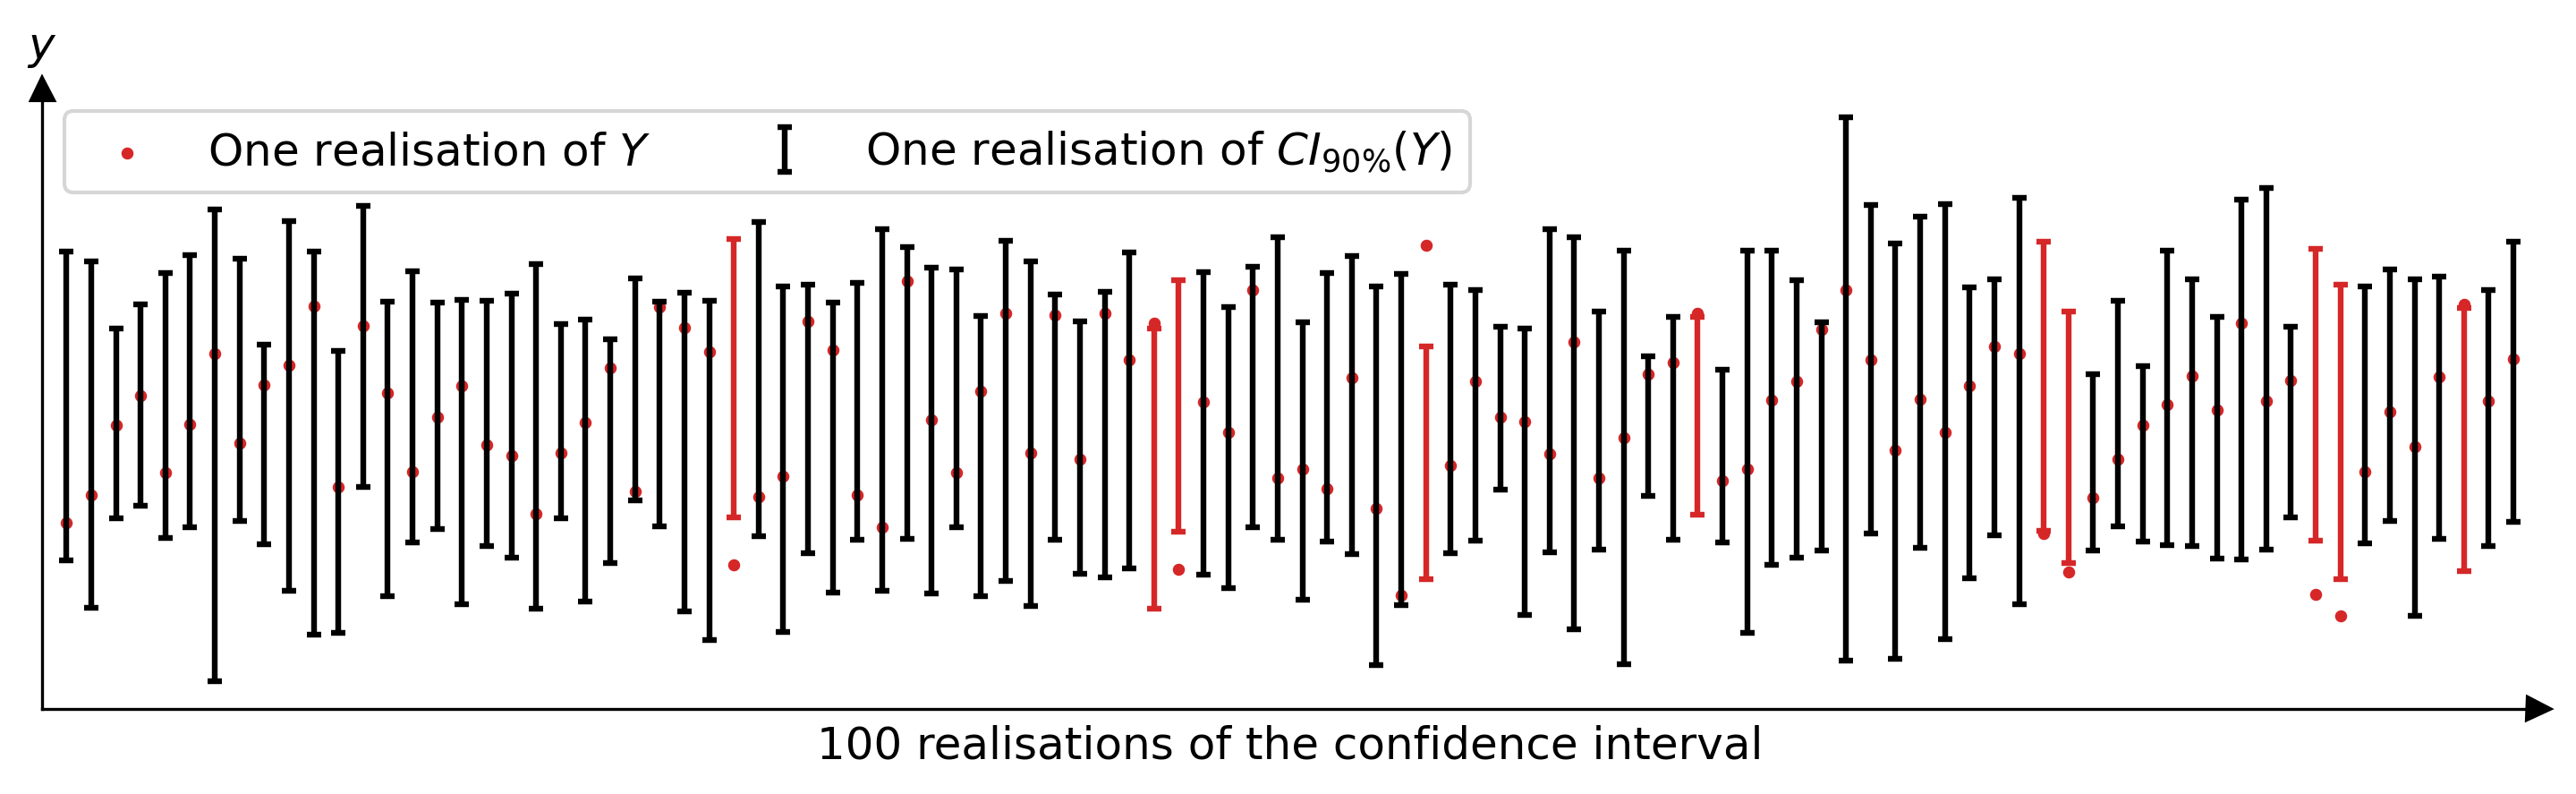

In [8]:
M = 10
np.random.seed(5) # 1
fig, ax = plt.subplots(1,1, dpi=dpi, figsize=(12,3))
k = 0

lw_    = lw/1.3
w_bar_ = 0.4/4
s      = 5
for i in range(100):
    Y_simu_intervals = np.random.normal(mu_X_theo, sigma_X_theo, M)
    new_Y = np.random.normal(mu_X_theo, sigma_X_theo, 1)[0]
    
    interval = np.mean(Y_simu_intervals) + np.array(t.interval(conf1, M-1, loc=0, scale=1))*np.std(Y_simu_intervals)*np.sqrt(1+1/M)
    if (interval.min()<=new_Y) and (new_Y<=interval.max()):
        color="black"
    else:
        color='tab:red'
        k+= 1
    if i==0:
        label_interval= "One realisation of "+r"$CI_{90\%}(Y)$"
        labels_Ys="One realisation of "+r"$Y$"
    else:
        label_interval=""
        labels_Ys = ""
    plot_interval(ax, i, interval, color, lw_, w_bar=w_bar_, markersize=w_bar_, label=label_interval)
    ax.scatter(i, new_Y, color="tab:red", s=s, label=labels_Ys)
    
plt.xticks([])
plt.yticks([])
plt.xlabel("100 realisations of the confidence interval", fontsize=fontsize)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['left'].set_visible(False)
#ax.spines['bottom'].set_visible(False)

xmin,xmax=np.copy(ax.get_xlim())
ymin,ymax=np.copy(ax.get_ylim())
xmin, xmax = -1, 100
    
ax.plot((xmax), (ymin), ls="", marker=">", ms=6, color="k", #transform=ax.get_yaxis_transform(), 
            clip_on=False)
ax.plot((xmin), (ymax), ls="", marker="^", ms=6, color="k", #transform=ax.get_xaxis_transform(), 
        clip_on=False)

ax.set_xlim(xmin,xmax)
ax.set_ylim(ymin,ymax)
ax.text(xmin, ymax+0.5, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')


# Legend
plt.legend(fontsize=fontsize, ncol=2) # loc='center left', bbox_to_anchor=(1, 0.5), 
plt.show()

#print(k)


# Figure 2

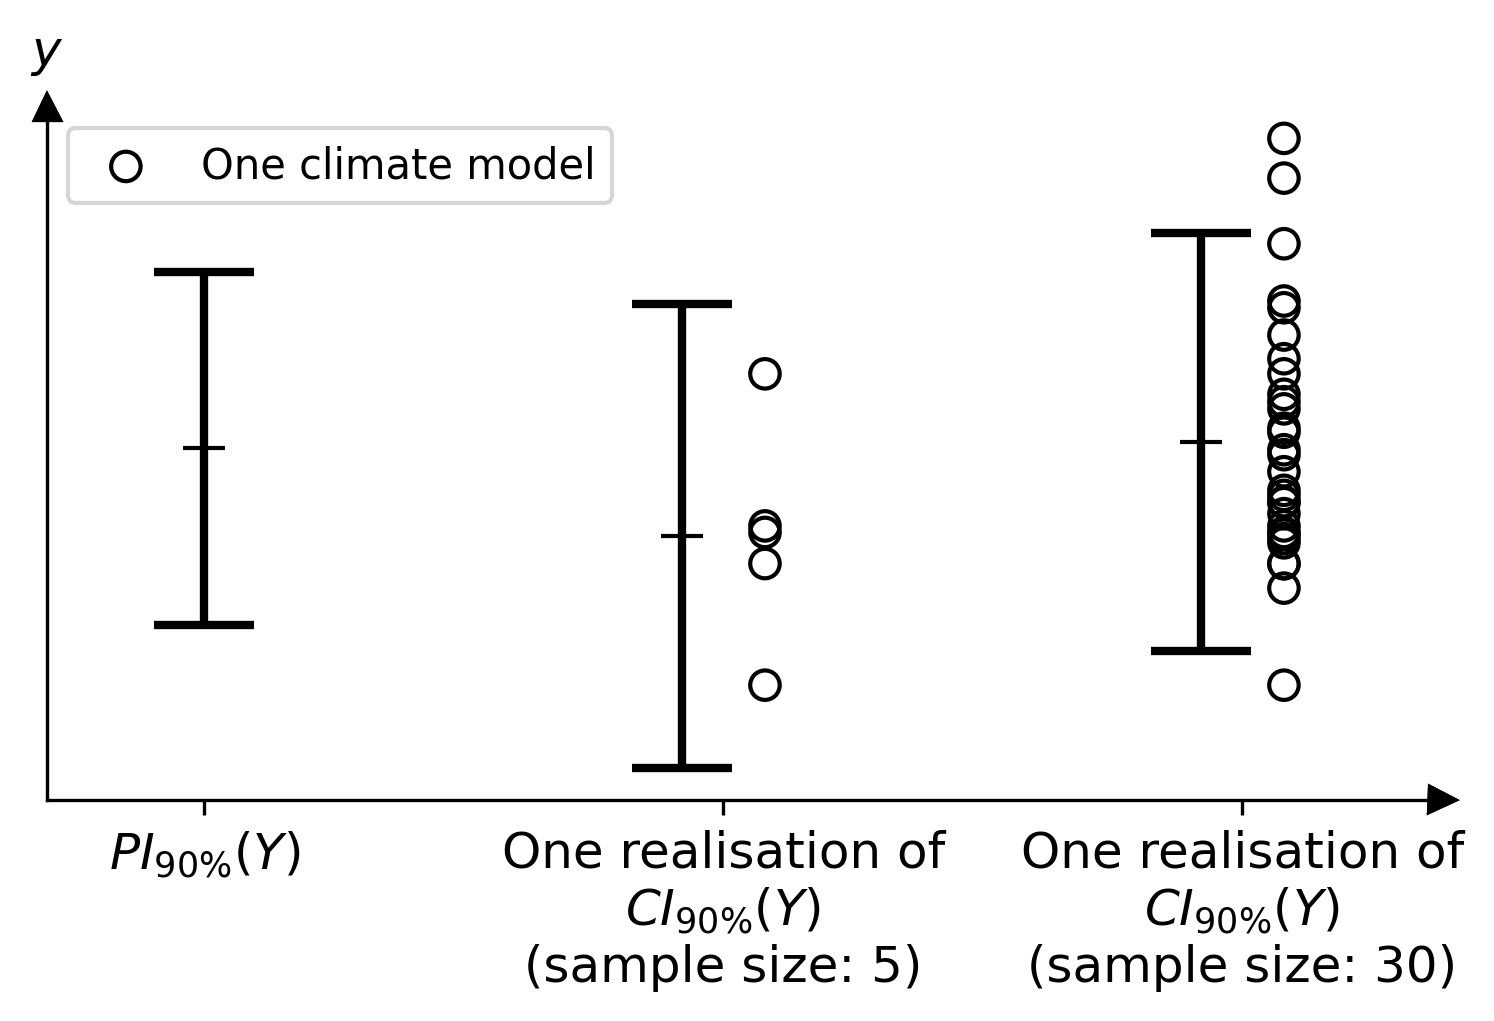

In [9]:
step      = 0
tiny_step = 0.08
lw        = 2
label1 = r"$PI_{90\%}(Y)$"
label3 = r"$CI_{90\%}(Y)$"
colors    = prop_cycle.by_key()['color']

colors = ["black", "black", "black"]

fig, axes = plt.subplots(1,1, figsize=(6,3), sharey=True, dpi=dpi)
plot_interval(axes, -1, interval_unconstrained_theo, "black", lw_low, w_bar=w_bar_true, label=None)
for i in np.flip(np.arange(nb_plots)):
    
    X_simu = list_X_simu[i]
    Y_simu = list_Y_simu[i]
    interval_unconstrained_est       = list_interval_unconstrained[i]

    label1 = "Theoretical "+r"$PI_{90\%}(Y)$"
    #label2 = r"$[\hat{\mu}_Y \pm z \, \hat{\sigma}_Y]$"
    label3 = "Realisation of "+r"$CI_{90\%}(Y)$"

    if i==0:
        label="One climate model"
    else:
        label=None
    axes.scatter(i*np.ones(len(X_simu))+step+tiny_step, Y_simu, s=50, marker="o", facecolor='none', edgecolors=colors[i],
                 label=label)
    plot_interval(axes, i+step-tiny_step, interval_unconstrained_est, colors[i], lw_low, w_bar=w_bar_right, label=None)

if False:
    axes.set_xticks([0, 1])
    axes.set_xticklabels(["Sample of\n{} climate models".format(len(list_X_simu[i])) for i in np.arange(nb_plots)],
                         fontsize=fontsize)#, rotation=45)
    for xtick, color in zip(axes.get_xticklabels(), [colors[i] for i in np.arange(nb_plots)]):
        xtick.set_color(color)
else:
    axes.set_xticks([-1, 0,1])
    axes.set_xticklabels([r"$PI_{90\%}(Y)$",
                             "One realisation of\n"+r"$CI_{90\%}(Y)$"+"\n"+r"(sample size: 5)",
                             "One realisation of\n"+r"$CI_{90\%}(Y)$"+"\n"+r"(sample size: 30)"], fontsize=fontsize, rotation=0)
    for xtick, color in zip(axes.get_xticklabels(), ["black"]+[colors[i] for i in np.arange(nb_plots)]):
        xtick.set_color(color)


axes.set_yticks([])
ymin,ymax=axes.get_ylim()
xmin,xmax=axes.get_xlim()
axes.text(xmin-0.2, ymax+0.5, r'$y$', fontsize=fontsize,
           horizontalalignment='center', verticalalignment='center')

axes.spines['top'].set_visible(False)
axes.spines['right'].set_visible(False)

axes.set_xlim(xmin-0.2,xmax+0.2)


#axes[i].set_title("Sample of size {}".format(len(X_simu)), color=colors[i], fontsize=fontsize) # , fontweight="bold"

if False:
    handles, labels = axes[0].get_legend_handles_labels()
    order = [0,1,2]
    order = [0,1]
    fig.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
                   loc='center', bbox_to_anchor=(1.1,0.5), fontsize=fontsize, ncol=1)
    
plt.legend()
    
#fig.legend(loc='center', bbox_to_anchor=(1.1,0.5), fontsize=fontsize, ncol=1)

#ax.set_xticks(range(nb_plots), ["M={}".format(M) for M in list_M], fontsize=fontsize)
#for xtick, color in zip(ax.get_xticklabels(), colors[:3]):
#    xtick.set_color(color)
#--------------- Flèche au bout des axes
for i in np.flip(np.arange(nb_plots)):
    xmin,xmax=np.copy(axes.get_xlim())
    ymin,ymax=np.copy(axes.get_ylim())
    axes.plot((xmax), (ymin), ls="", marker=">", ms=6, color="k", #transform=ax.get_yaxis_transform(), 
                clip_on=False)
    axes.plot((xmin), (ymax), ls="", marker="^", ms=6, color="k", #transform=ax.get_xaxis_transform(), 
            clip_on=False)
    axes.set_xlim(xmin,xmax)
    axes.set_ylim(ymin,ymax)


plt.show()

In [10]:
# Relative differences between the probability interval and the two confidence intervals obtained
mu    = np.mean(interval_unconstrained_theo)
sigma = np.diff(interval_unconstrained_theo)[0]
mu_1  = np.mean(list_interval_unconstrained[0])
s_1   = np.diff(list_interval_unconstrained[0])[0]
mu_2  = np.mean(list_interval_unconstrained[1])
s_2   = np.diff(list_interval_unconstrained[1])[0]

print("Probability interval: [{:.2f} +- {:.2f} sigma]".format(mu, 1))
print("Confidence interval realisation n°1: [{:.2f} sigma +- {:.2f} sigma]".format(mu_1/sigma, s_1/sigma))
print("Confidence interval realisation n°2: [{:.2f} sigma +- {:.2f} sigma]".format(mu_2/sigma, s_2/sigma))


Probability interval: [-0.00 +- 1.00 sigma]
Confidence interval realisation n°1: [-0.25 sigma +- 1.32 sigma]
Confidence interval realisation n°2: [0.02 sigma +- 1.18 sigma]


# Figure 3 and 6

In [11]:
def err_interval_unconstrained(conf, M):
    wrong = np.array(t.interval(conf, np.inf, loc=0, scale=1))[1]
    right = np.array(t.interval(conf, M-1, loc=0, scale=1))[1] * np.sqrt(1+1/M)
    
    return 100*np.abs(wrong-right)/right

def err_interval_constrained(conf, M, normalized_obs):
    wrong = np.array(t.interval(conf, np.inf, loc=0, scale=1))[1]
    right = np.array(t.interval(conf, M-2, loc=0, scale=1))[1] * np.sqrt(1+1/M+normalized_obs**2/M)
    
    return 100*np.abs(wrong-right)/right

In [12]:
list_obs_stand       = np.linspace(0, 2, 100)
list_confidences     = np.linspace(0.6,1,100)
list_M               = np.arange(2,51)
nb_confidences, nb_M = len(list_confidences), len(list_M)
nb_obs_stand         = len(list_obs_stand)
relativeError_im     = np.zeros((nb_confidences, nb_M))
relativeError_im_con = np.zeros((nb_obs_stand, nb_M))

for id_confidence in range(nb_confidences):
    for id_M in range(nb_M):
        relativeError_im[id_confidence, id_M] = err_interval_unconstrained(
            list_confidences[id_confidence], list_M[id_M])
        
for id_obs_stand in range(nb_obs_stand):
    for id_M in range(nb_M):
        relativeError_im_con[id_obs_stand, id_M] = err_interval_constrained(
            0.68, list_M[id_M], list_obs_stand[id_obs_stand])

C:\Users\vportmann\AppData\Local\Temp\ipykernel_15272\3327127224.py:5: RuntimeWarning: invalid value encountered in scalar subtract
  return 100*np.abs(wrong-right)/right


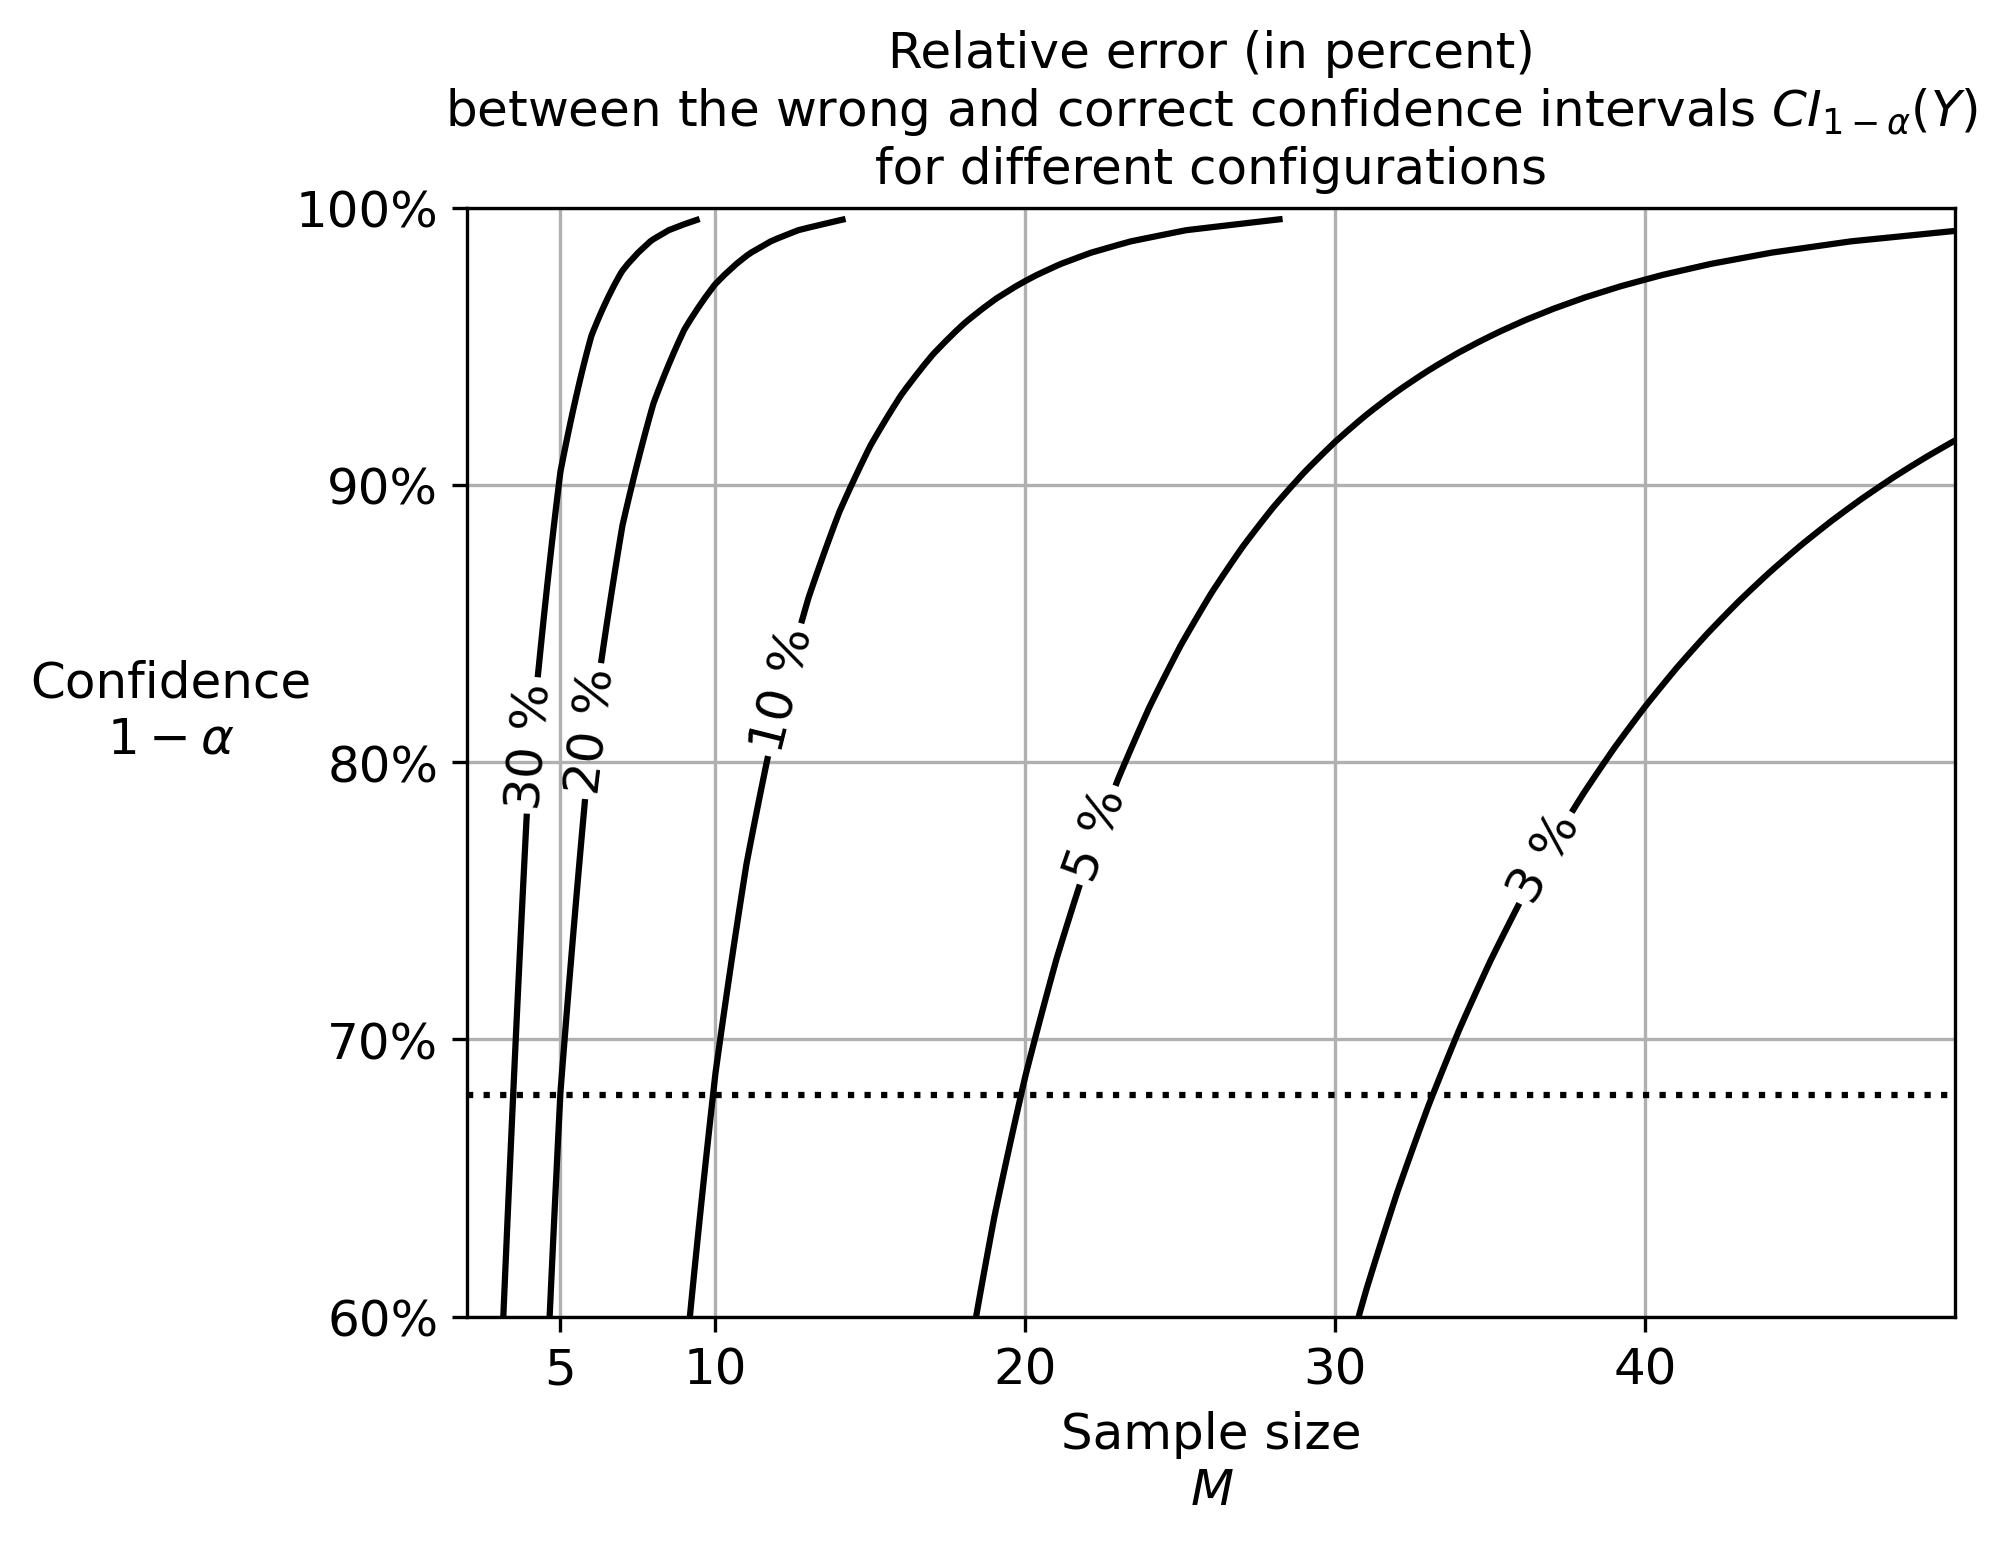

In [13]:
#plt.imshow(relativeError_im)
plt.figure(dpi=dpi)
X, Y = np.meshgrid(list_confidences, list_M)
plt.axhline(y=0.68, linestyle='dotted', color='black')
for lev in [3,5,10,20,30]:
    CS = plt.contour(Y.T, X.T, relativeError_im, levels=[lev], colors='black')
    plt.clabel(CS, inline=True, fontsize=fontsize, fmt="{} %%".format(lev))
plt.ylabel("Confidence\n"+r"$1-\alpha$", rotation=0, ha='center', fontsize=fontsize, labelpad=30)
plt.xlabel("Sample size\n"+r"$M$", fontsize=fontsize)
plt.title("Relative error (in percent)\nbetween the wrong and correct confidence intervals "+r"$CI_{1-\alpha}(Y)$"+"\nfor different configurations", fontsize=fontsize)

plt.xticks([5,10,20,30,40], fontsize=fontsize)
yticks = np.array([0.6,0.7,0.8,0.9,1])
plt.yticks(yticks, [str(int(100*yticks[i]))+"%" for i in range(len(yticks))], fontsize=fontsize)
plt.grid()
plt.show()

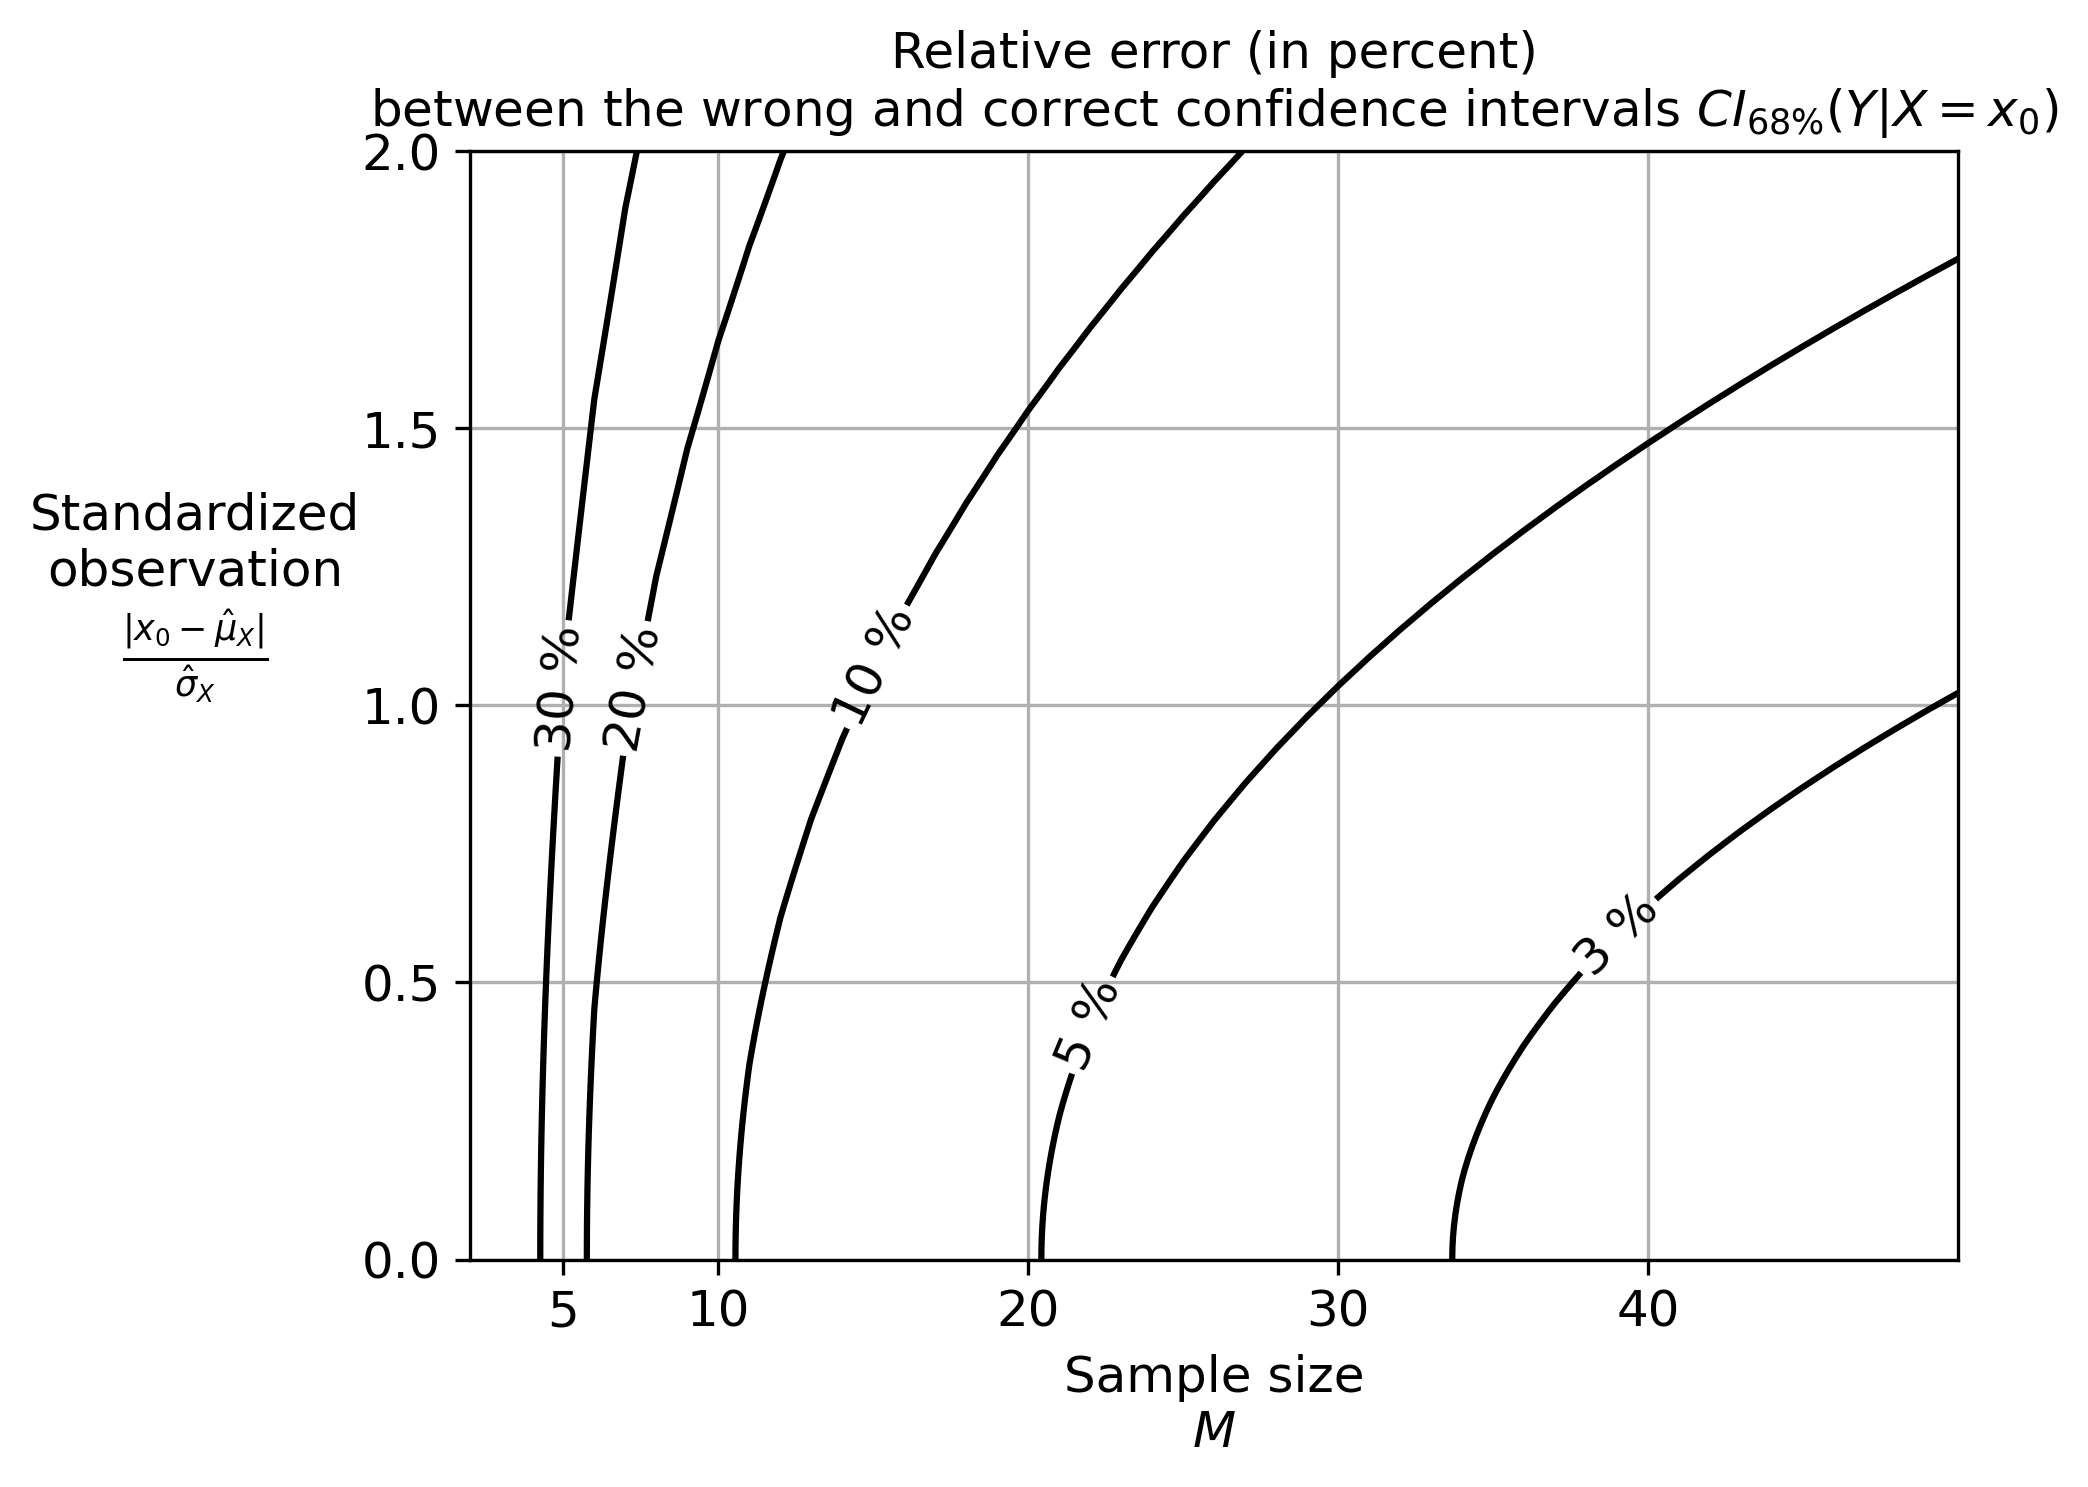

In [14]:
plt.figure(dpi=dpi)
X, Y = np.meshgrid(list_obs_stand, list_M)
for lev in [3,5,10,20,30]:
    CS = plt.contour(Y.T, X.T, relativeError_im_con, levels=[lev], colors='black')
    plt.clabel(CS, inline=True, fontsize=fontsize, fmt="{} %%".format(lev))
plt.ylabel("Standardized\nobservation\n"+r"$\frac{|x_0-\hat{\mu}_X|}{\hat{\sigma}_X}$", rotation=0, ha='center', fontsize=fontsize, labelpad=40)
plt.xlabel("Sample size\n"+r"$M$", fontsize=fontsize)
plt.title("Relative error (in percent)\nbetween the wrong and correct confidence intervals "+r"$CI_{68\%}(Y|X=x_0)$", fontsize=fontsize)

plt.xticks([5,10,20,30,40], fontsize=fontsize)
yticks = np.array([0,0.5,1,1.5,2])
plt.yticks(yticks, fontsize=fontsize)#, [str(int(100*yticks[i]))+"%" for i in range(len(yticks))], fontsize=fontsize)
plt.grid()
plt.show()

# Figure 4

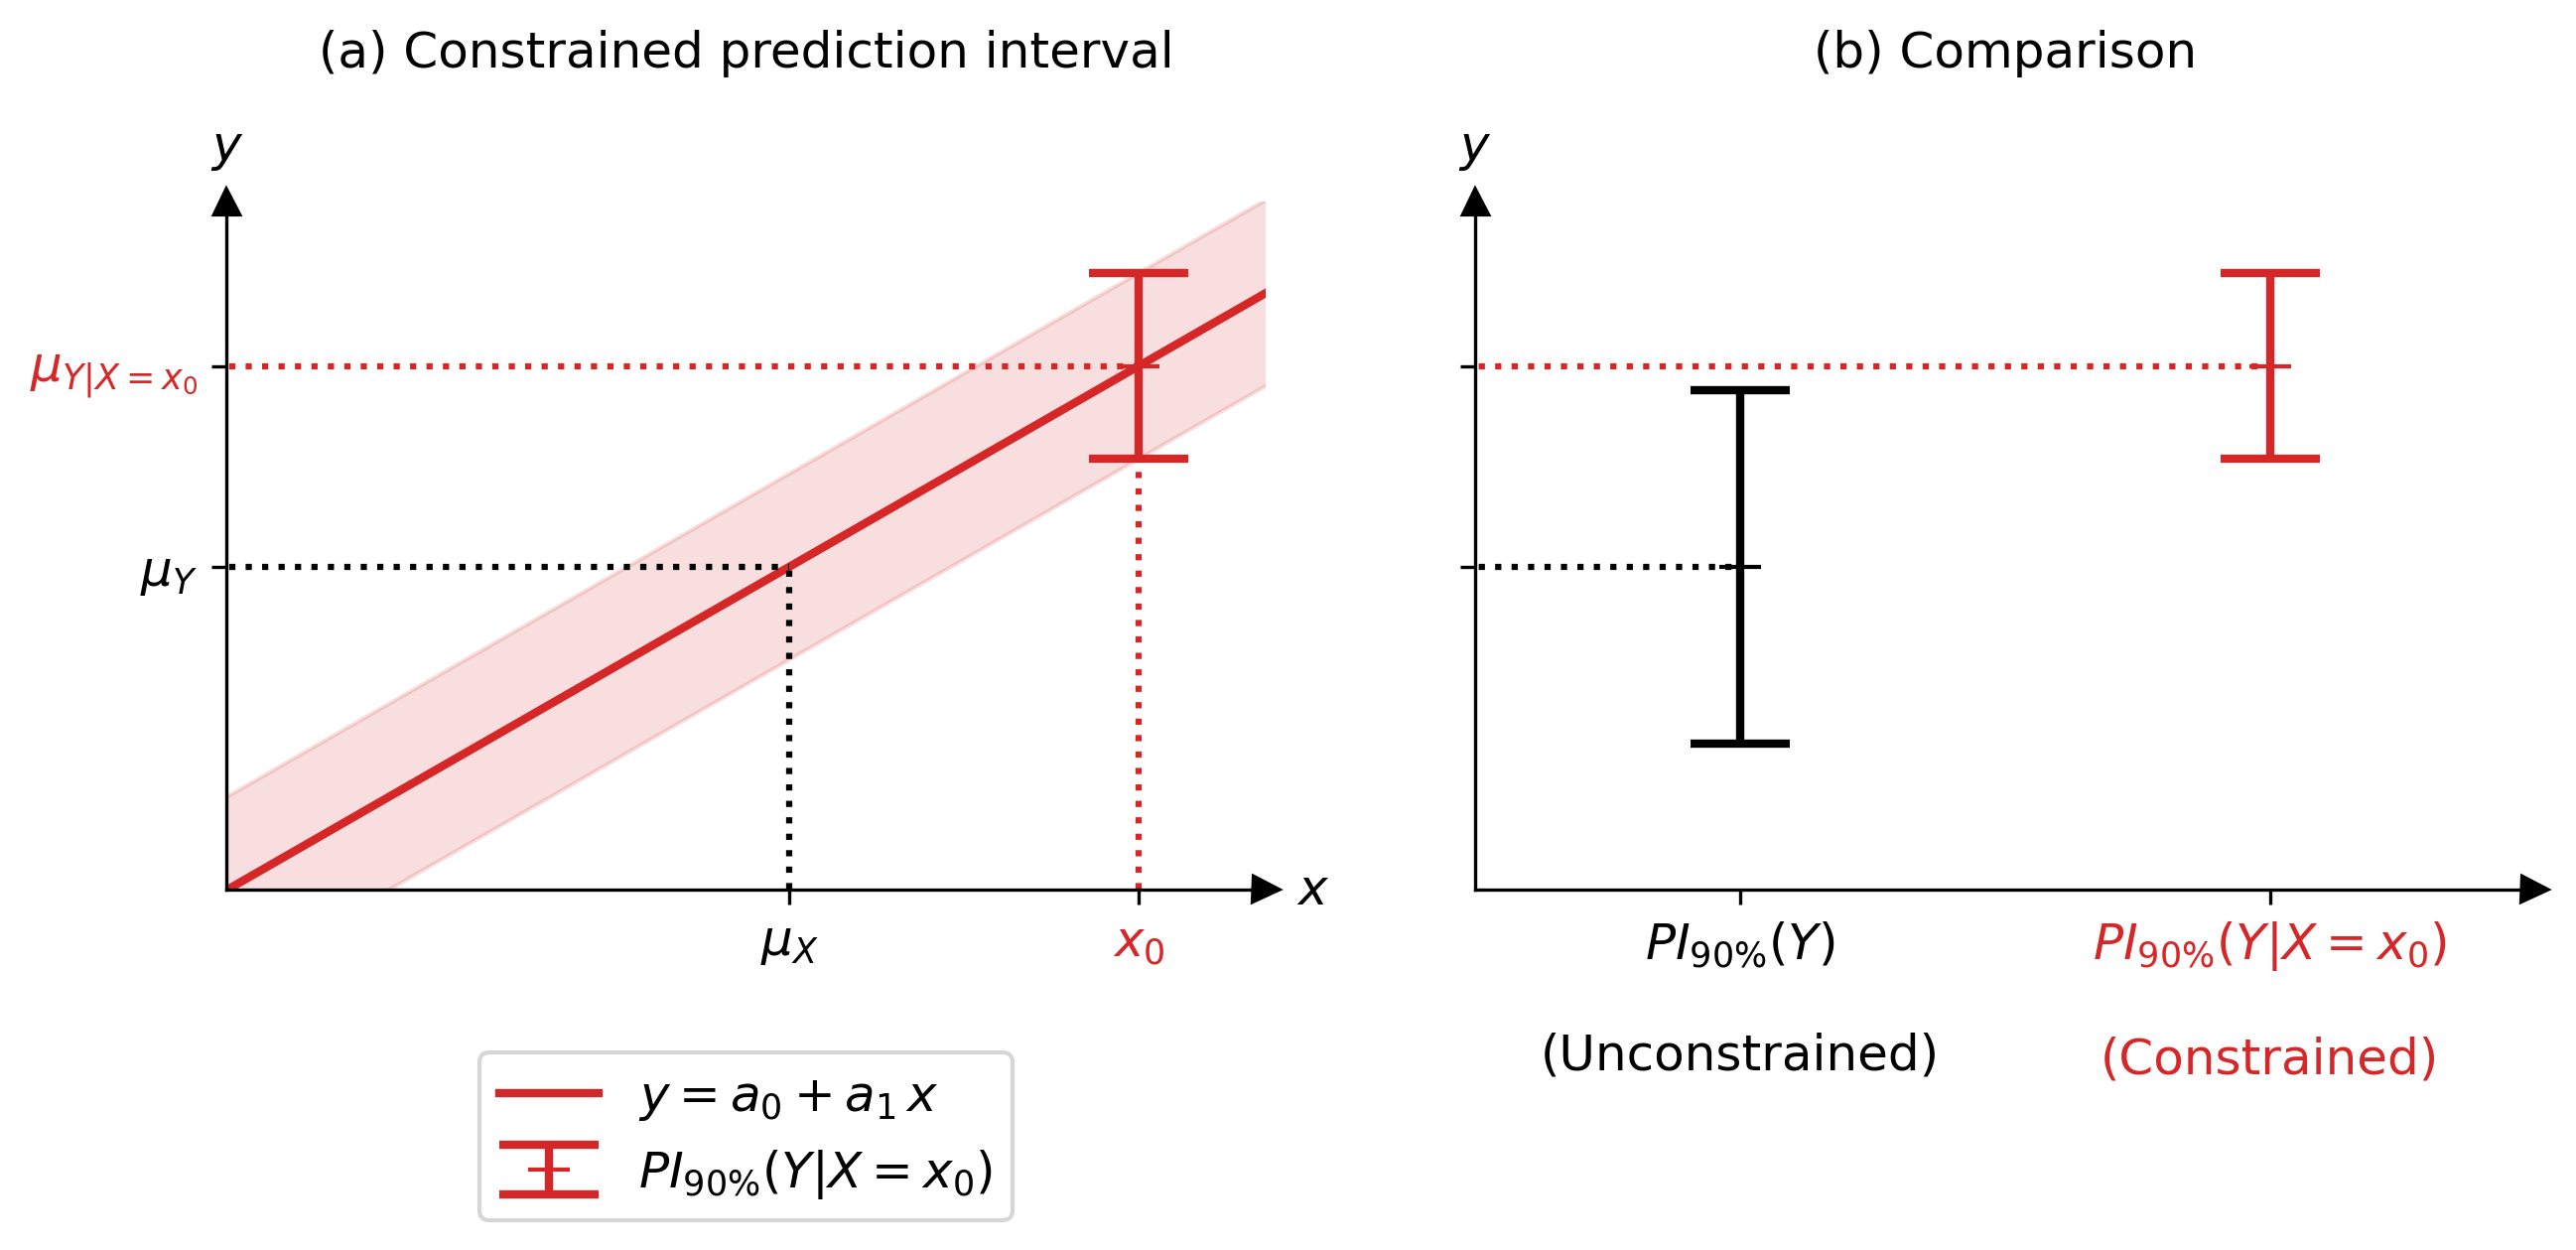

In [15]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

step  = 0.5
alpha = 0.15

Y_simu_ = beta_0+beta_1*X_simu_
ymin,ymax = Y_simu_.min(), Y_simu_.max()#+5
xmin,xmax = X_simu_.min(), X_simu_.max()-1#+2*step

fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=True, width_ratios=(1,1.02), dpi=dpi)#, sharex=True)

label_uncons_theo = r"$PI_{90\%}(Y)$"
label_cons_theo   = r"$PI_{90\%}(Y|X=x_0)$"


# Constrained

color_cons_noiseless = "tab:red"
colors = ["black", color_cons_noiseless]
axes[0].plot(x, beta_0+beta_1*x, color=color_cons_noiseless, linewidth=lw_low, linestyle='solid', label=r"$y=a_0+a_1\,x$")
axes[0].set_xticks([mu_X_theo, X_obs], labels=[r"$\mu_X$", r"$x_0$"], fontsize=fontsize)
for ticklabel, tickcolor in zip(axes[0].get_xticklabels(), colors):
    ticklabel.set_color(tickcolor)
plot_interval(axes[0], X_obs, interval_nonnoisy_theo, color_cons_noiseless, lw_low, w_bar=w_bar_true, label=label_cons_theo)
axes[0].fill_between(x, beta_0+beta_1*x-np.abs(np.diff(interval_nonnoisy_theo))/2,
                        beta_0+beta_1*x+np.abs(np.diff(interval_nonnoisy_theo))/2,
                        alpha=alpha, color=color_cons_noiseless)
#axes[0].plot(x, beta_0+beta_1*x-np.abs(np.diff(interval_nonnoisy_theo))/2, color=color_cons_noiseless, linewidth=lw_high/2, linestyle='solid')
#axes[0].plot(x, beta_0+beta_1*x+np.abs(np.diff(interval_nonnoisy_theo))/2, color=color_cons_noiseless, linewidth=lw_high/2, linestyle='solid')
axes[0].set_title("(a) Constrained prediction interval\n\n")
axes[0].legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.2), loc='upper center')

j = 0
for x_temp in [mu_X_theo, X_obs]:
    axes[0].vlines(x_temp, color=colors[j], linestyle="dotted", ymax=beta_0+beta_1*x_temp, ymin=-10000)
    axes[0].hlines(beta_0+beta_1*x_temp, color=colors[j], linestyle="dotted", xmin=-1000, xmax=x_temp)
    axes[1].hlines(beta_0+beta_1*x_temp, color=colors[j], linestyle="dotted", xmin=-1000, xmax=j)
    j += 1
    
# Constrained VS unconstrained
plot_interval(axes[1], 0, interval_unconstrained_theo, "black", lw_low, w_bar=w_bar_true, label=label_uncons_theo)
plot_interval(axes[1], 1, interval_nonnoisy_theo, color_cons_noiseless, lw_low, w_bar=w_bar_true, label=label_cons_theo)
axes[1].set_title("(b) Comparison\n\n", fontsize=fontsize)
axes[1].set_xlim(-0.5,1.5)
axes[1].set_xticks([0,1])
#axes[1].set_xticklabels(["Constrained\n\n"+label_uncons_theo, "Unconstrained\n\n"+label_cons_theo], fontsize=fontsize, rotation=0)
axes[1].set_xticklabels([label_uncons_theo+"\n\n(Unconstrained)",
                         label_cons_theo+"\n\n(Constrained)"], fontsize=fontsize, rotation=0)
for ticklabel, tickcolor in zip(axes[1].get_xticklabels(), colors):
    ticklabel.set_color(tickcolor)
axes[1].text(-0.5, ymax+0.5, r'$y$', fontsize=fontsize,
               horizontalalignment='center', verticalalignment='center')


for i in range(1):
    axes[i].set_ylim(ymin, ymax)
    axes[i].set_xlim(xmin, xmax)
    axes[i].text(xmin, ymax+0.5, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
    axes[i].text(xmax+0.3, ymin, r'$x$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
for i in range(2):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_yticks([beta_0+beta_1*mu_X_theo, beta_0+beta_1*X_obs], labels=[r"$\mu_Y$", r"$\mu_{Y|X=x_0}$"], fontsize=fontsize)
    for ticklabel, tickcolor in zip(axes[i].get_yticklabels(), colors):
        ticklabel.set_color(tickcolor)
    
#--------------- Flèche au bout des axes
for i in range(2):
    xmin,xmax=np.copy(axes[i].get_xlim())
    ymin,ymax=np.copy(axes[i].get_ylim())
    axes[i].plot((xmax), (ymin), ls="", marker=">", ms=6, color="k", #transform=ax.get_yaxis_transform(), 
                clip_on=False)
    axes[i].plot((xmin), (ymax), ls="", marker="^", ms=6, color="k", #transform=ax.get_xaxis_transform(), 
            clip_on=False)
    axes[i].set_xlim(xmin,xmax)
    axes[i].set_ylim(ymin,ymax)


plt.show()

# Figure 5

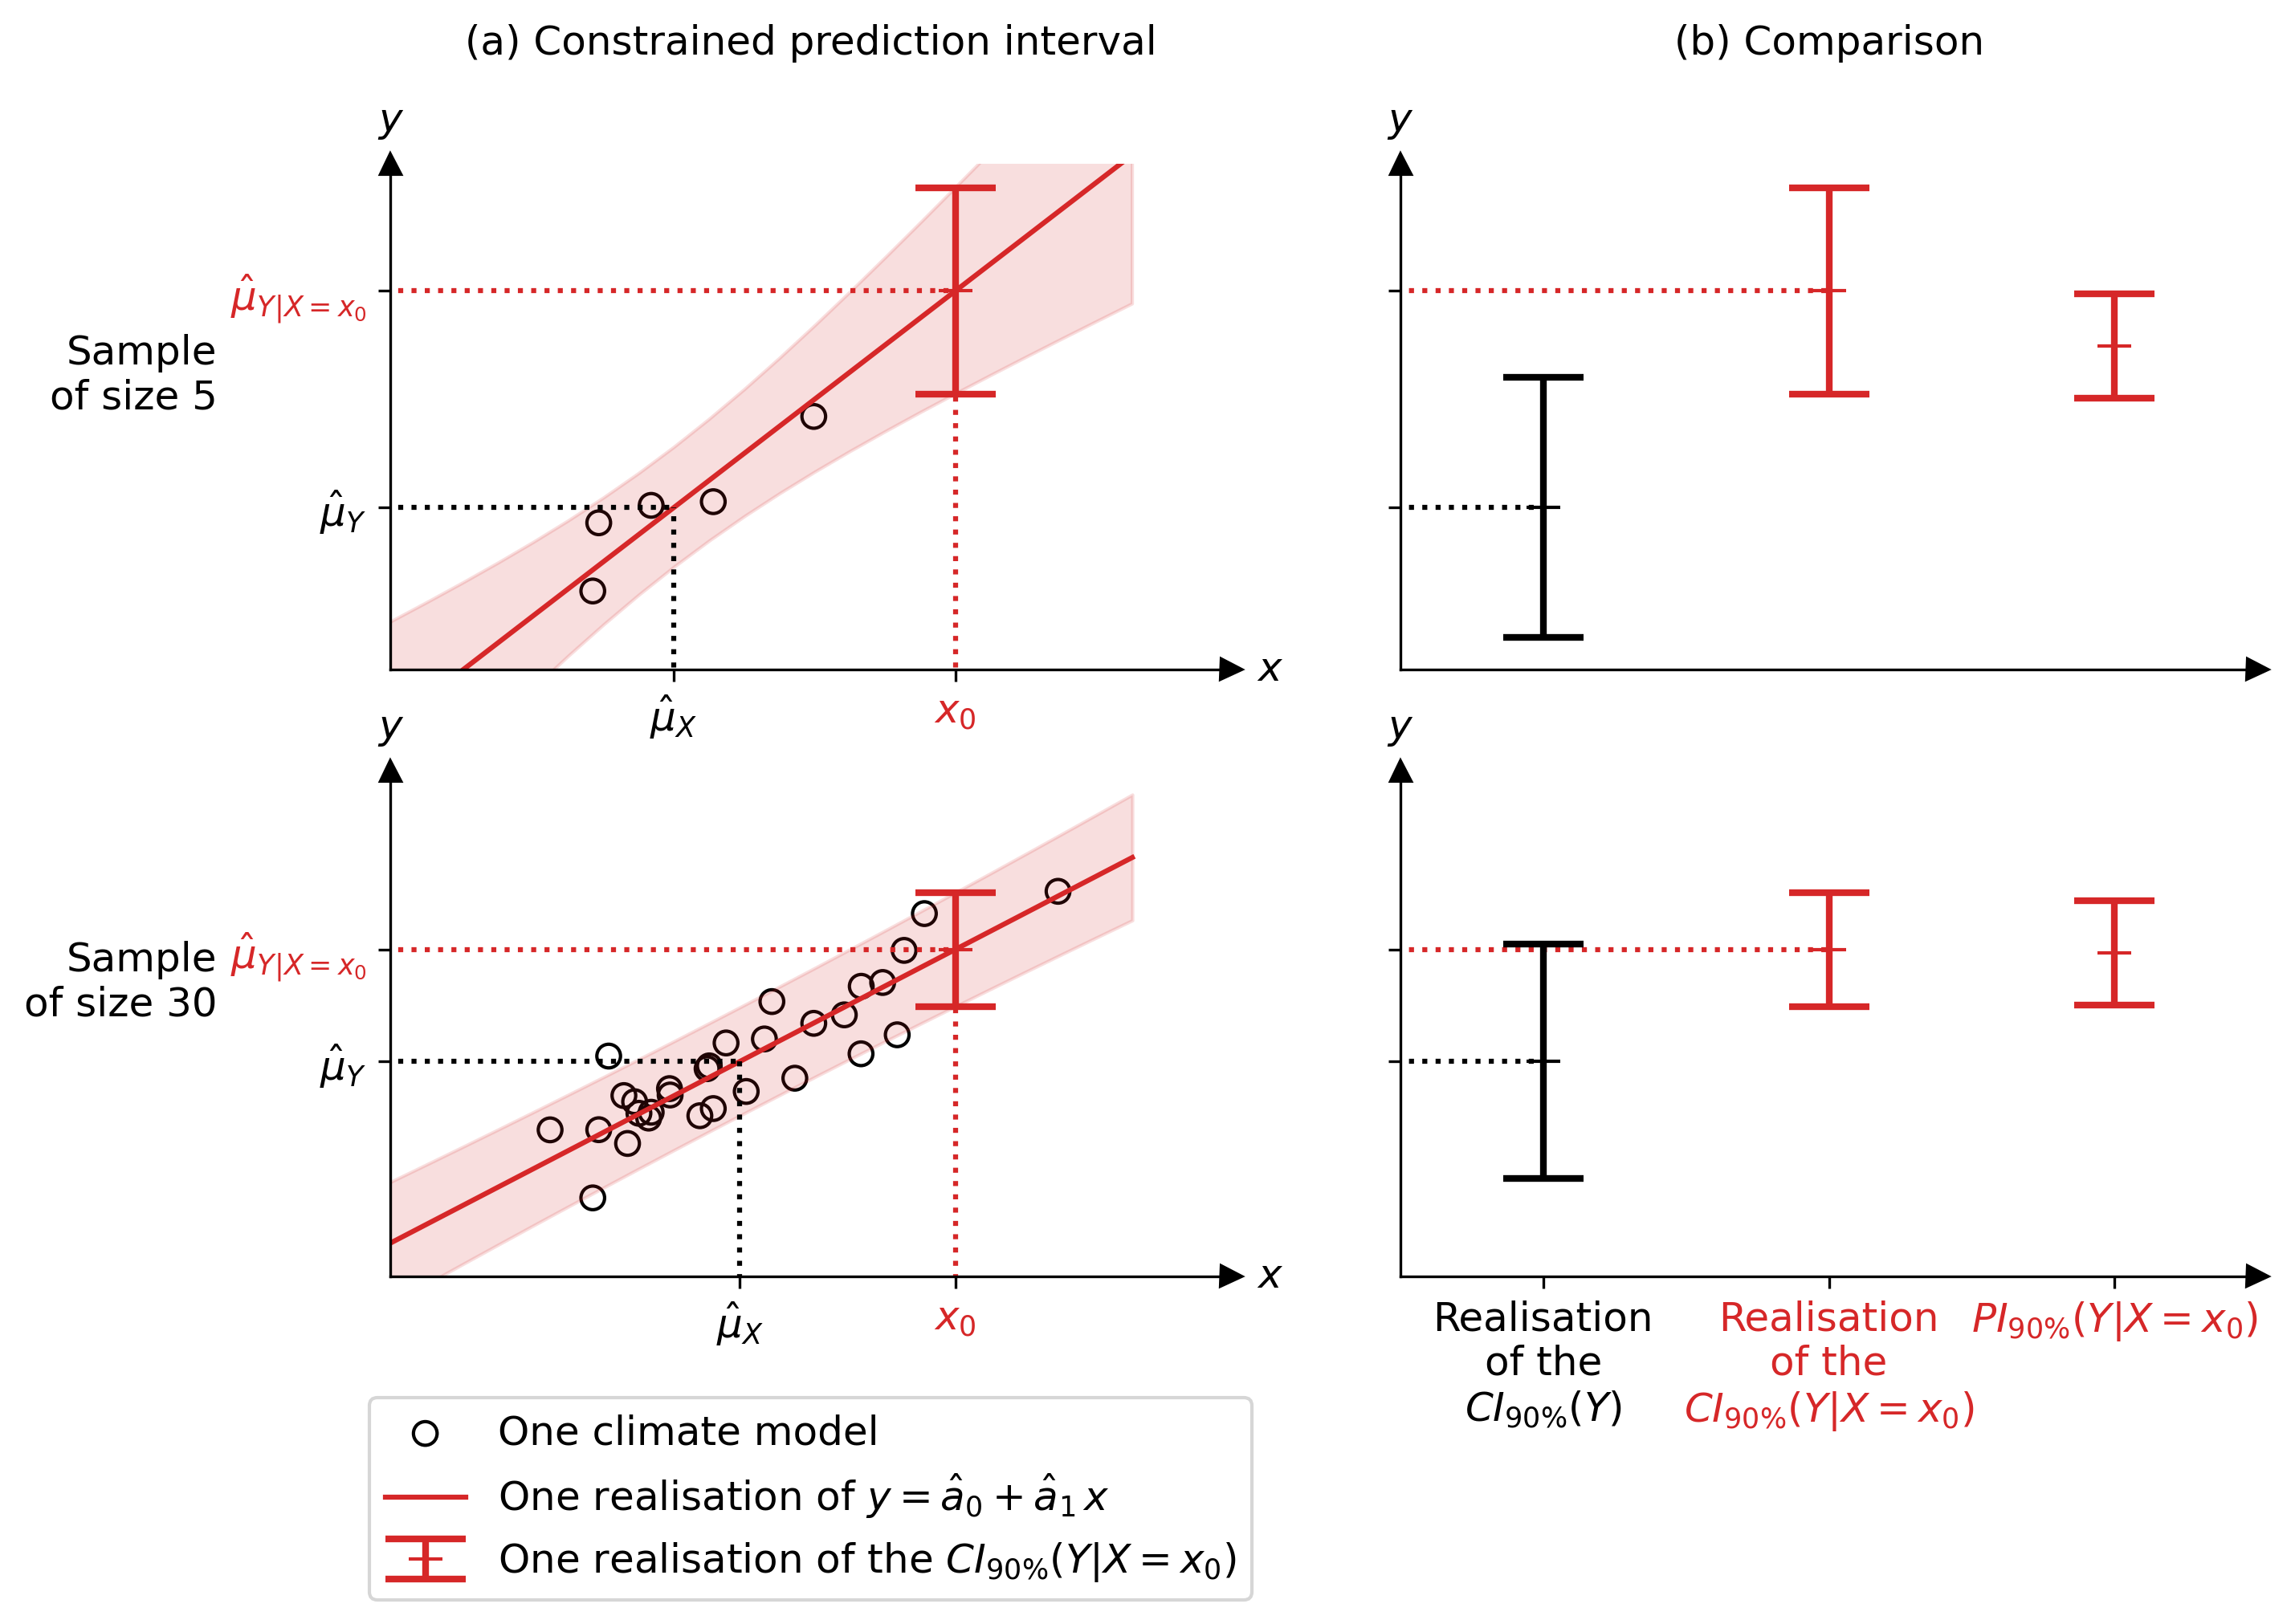

In [16]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

step  = 0.5
alpha = 0.15

Y_simu_ = beta_0+beta_1*X_simu_
ymin,ymax = Y_simu_.min()-0.5, Y_simu_.max()+1.5#+5
xmin,xmax = X_simu_.min(), X_simu_.max()+1#+2*step

fig, axes = plt.subplots(2,2, figsize=(10,6), sharey='row', width_ratios=(1,1.02), dpi=dpi)#, sharex=True)


list_letters = ["(a)", "(b)", "(c)", "(d)"]
# Estimated
colors = ["black", color_cons_noiseless]
for i in range(nb_plots):
    X_simu = list_X_simu[i]
    Y_simu = list_Y_simu[i]
    interval_nonnoisy_est        = list_interval_nonnoisy[i]
    intervals_nonnoisy_est       = list_intervals_nonnoisy[i]
    interval_unconstrained_est       = list_interval_unconstrained[i]
    label1 = r"$PI_{90\%}(Y|X=x_0)$" 
    label3 = "One realisation of the "+r"$CI_{90\%}(Y|X=x_0)$"
    label  = "One climate model"
        
    # Constrained
    axes[i,0].scatter(X_simu, Y_simu, s=50, marker="o", facecolor='none', edgecolors=colors[0], label=label)
    axes[i,0].set_xticks([np.mean(X_simu), X_obs], labels=[r"$\hat{\mu}_X$", r"$x_0$"], fontsize=fontsize)
    for ticklabel, tickcolor in zip(axes[i,0].get_xticklabels(), colors):
            ticklabel.set_color(tickcolor)
    plot_interval(axes[i,0], X_obs, interval_nonnoisy_est, colors[1], lw_low, w_bar=w_bar_right, label=label3)
    #for k in range(2): axes[i,0].plot(x, intervals_nonnoisy_est[:, k], color=colors[1], linewidth=lw_low/2, linestyle='solid')

    axes[i,0].fill_between(x, intervals_nonnoisy_est[:,0], intervals_nonnoisy_est[:,1],
                         alpha=alpha, color=colors[1])
    if i==0: axes[i,0].set_title("(a) Constrained prediction interval\n\n")
    axes[i,0].plot(x, np.mean(intervals_nonnoisy_est, axis=1), color=colors[1],
             linewidth=lw_high/2, linestyle='solid', label="One realisation of "+r"$y=\hat{a}_0+\hat{a}_1\,x$")
    if i==1: axes[i,0].legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.2), loc='upper center')
        
    # Pointillés
    j = -1
    for (x_temp,y_temp) in [(np.mean(X_simu),np.mean(interval_unconstrained_est)), (X_obs,np.mean(interval_nonnoisy_est))]:
        axes[i,0].vlines(x_temp, color=colors[j+1], linestyle="dotted", ymax=y_temp, ymin=-10000)
        axes[i,0].hlines(y_temp, color=colors[j+1], linestyle="dotted", xmin=-1000, xmax=x_temp)
        axes[i,1].hlines(y_temp, color=colors[j+1], linestyle="dotted", xmin=-1000, xmax=j)
        j += 1

    
    # Constrained VS unconstrained
    plot_interval(axes[i,1], -1, interval_unconstrained_est, colors[0], lw_low, w_bar=w_bar_right, label=label3)
    plot_interval(axes[i,1], 0, interval_nonnoisy_est, colors[1], lw_low, w_bar=w_bar_right, label=label3)
    plot_interval(axes[i,1], 1, interval_nonnoisy_theo, colors[1], lw_low, w_bar=w_bar_true, label=label1)
    if i==0: axes[i,1].set_title("(b) Comparison\n\n", fontsize=fontsize)
    axes[i,1].set_xlim(-1.5,1.5)
    if i==1:
        axes[i,1].set_xticks([1, 0, -1])
        axes[i,1].set_xticklabels([r"$PI_{90\%}(Y|X=x_0)$",
                                   "Realisation\nof the\n"+r"$CI_{90\%}(Y|X=x_0)$",
                                   "Realisation\nof the\n"+r"$CI_{90\%}(Y)$"],
                                  fontsize=fontsize, rotation=0)
        for ticklabel, tickcolor in zip(axes[i,1].get_xticklabels(), [color_cons_noiseless, color_cons_noiseless, "black"]):
            ticklabel.set_color(tickcolor)
        ticks = axes[i,1].get_xticklabels()
        #ticks[-1].set_rotation(10)
    else: axes[i,1].set_xticks([])
    axes[i,1].text(-1.5, ymax+0.7, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')


    axes[i,0].set_ylim(ymin, ymax)
    axes[i,0].set_xlim(xmin, xmax)
    axes[i,0].text(xmin, ymax+0.7, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
    axes[i,0].text(xmax+0.4, ymin, r'$x$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
    
    for j in range(2):
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].set_yticks([np.mean(interval_unconstrained_est), np.mean(interval_nonnoisy_est)],
                             labels=[r"$\hat{\mu}_Y$", r"$\hat{\mu}_{Y|X=x_0}$"], fontsize=fontsize)
        for ticklabel, tickcolor in zip(axes[i,j].get_yticklabels(), colors):
            ticklabel.set_color(tickcolor)

    
    axes[i,0].set_ylabel("Sample\nof size {}".format(len(X_simu)), 
                         rotation=0, horizontalalignment='right', fontsize=fontsize)


   
#--------------- Flèche au bout des axes
for i in range(nb_plots):
    for j in range(2):
        xmin,xmax=np.copy(axes[i,j].get_xlim())
        ymin,ymax=np.copy(axes[i,j].get_ylim())
        axes[i,j].plot((xmax), (ymin), ls="", marker=">", ms=6, color="k", #transform=ax.get_yaxis_transform(), 
                    clip_on=False)
        axes[i,j].plot((xmin), (ymax), ls="", marker="^", ms=6, color="k", #transform=ax.get_xaxis_transform(), 
                clip_on=False)
        axes[i,j].set_xlim(xmin,xmax)
        axes[i,j].set_ylim(ymin,ymax)
        
        

plt.show()

# Figure 7

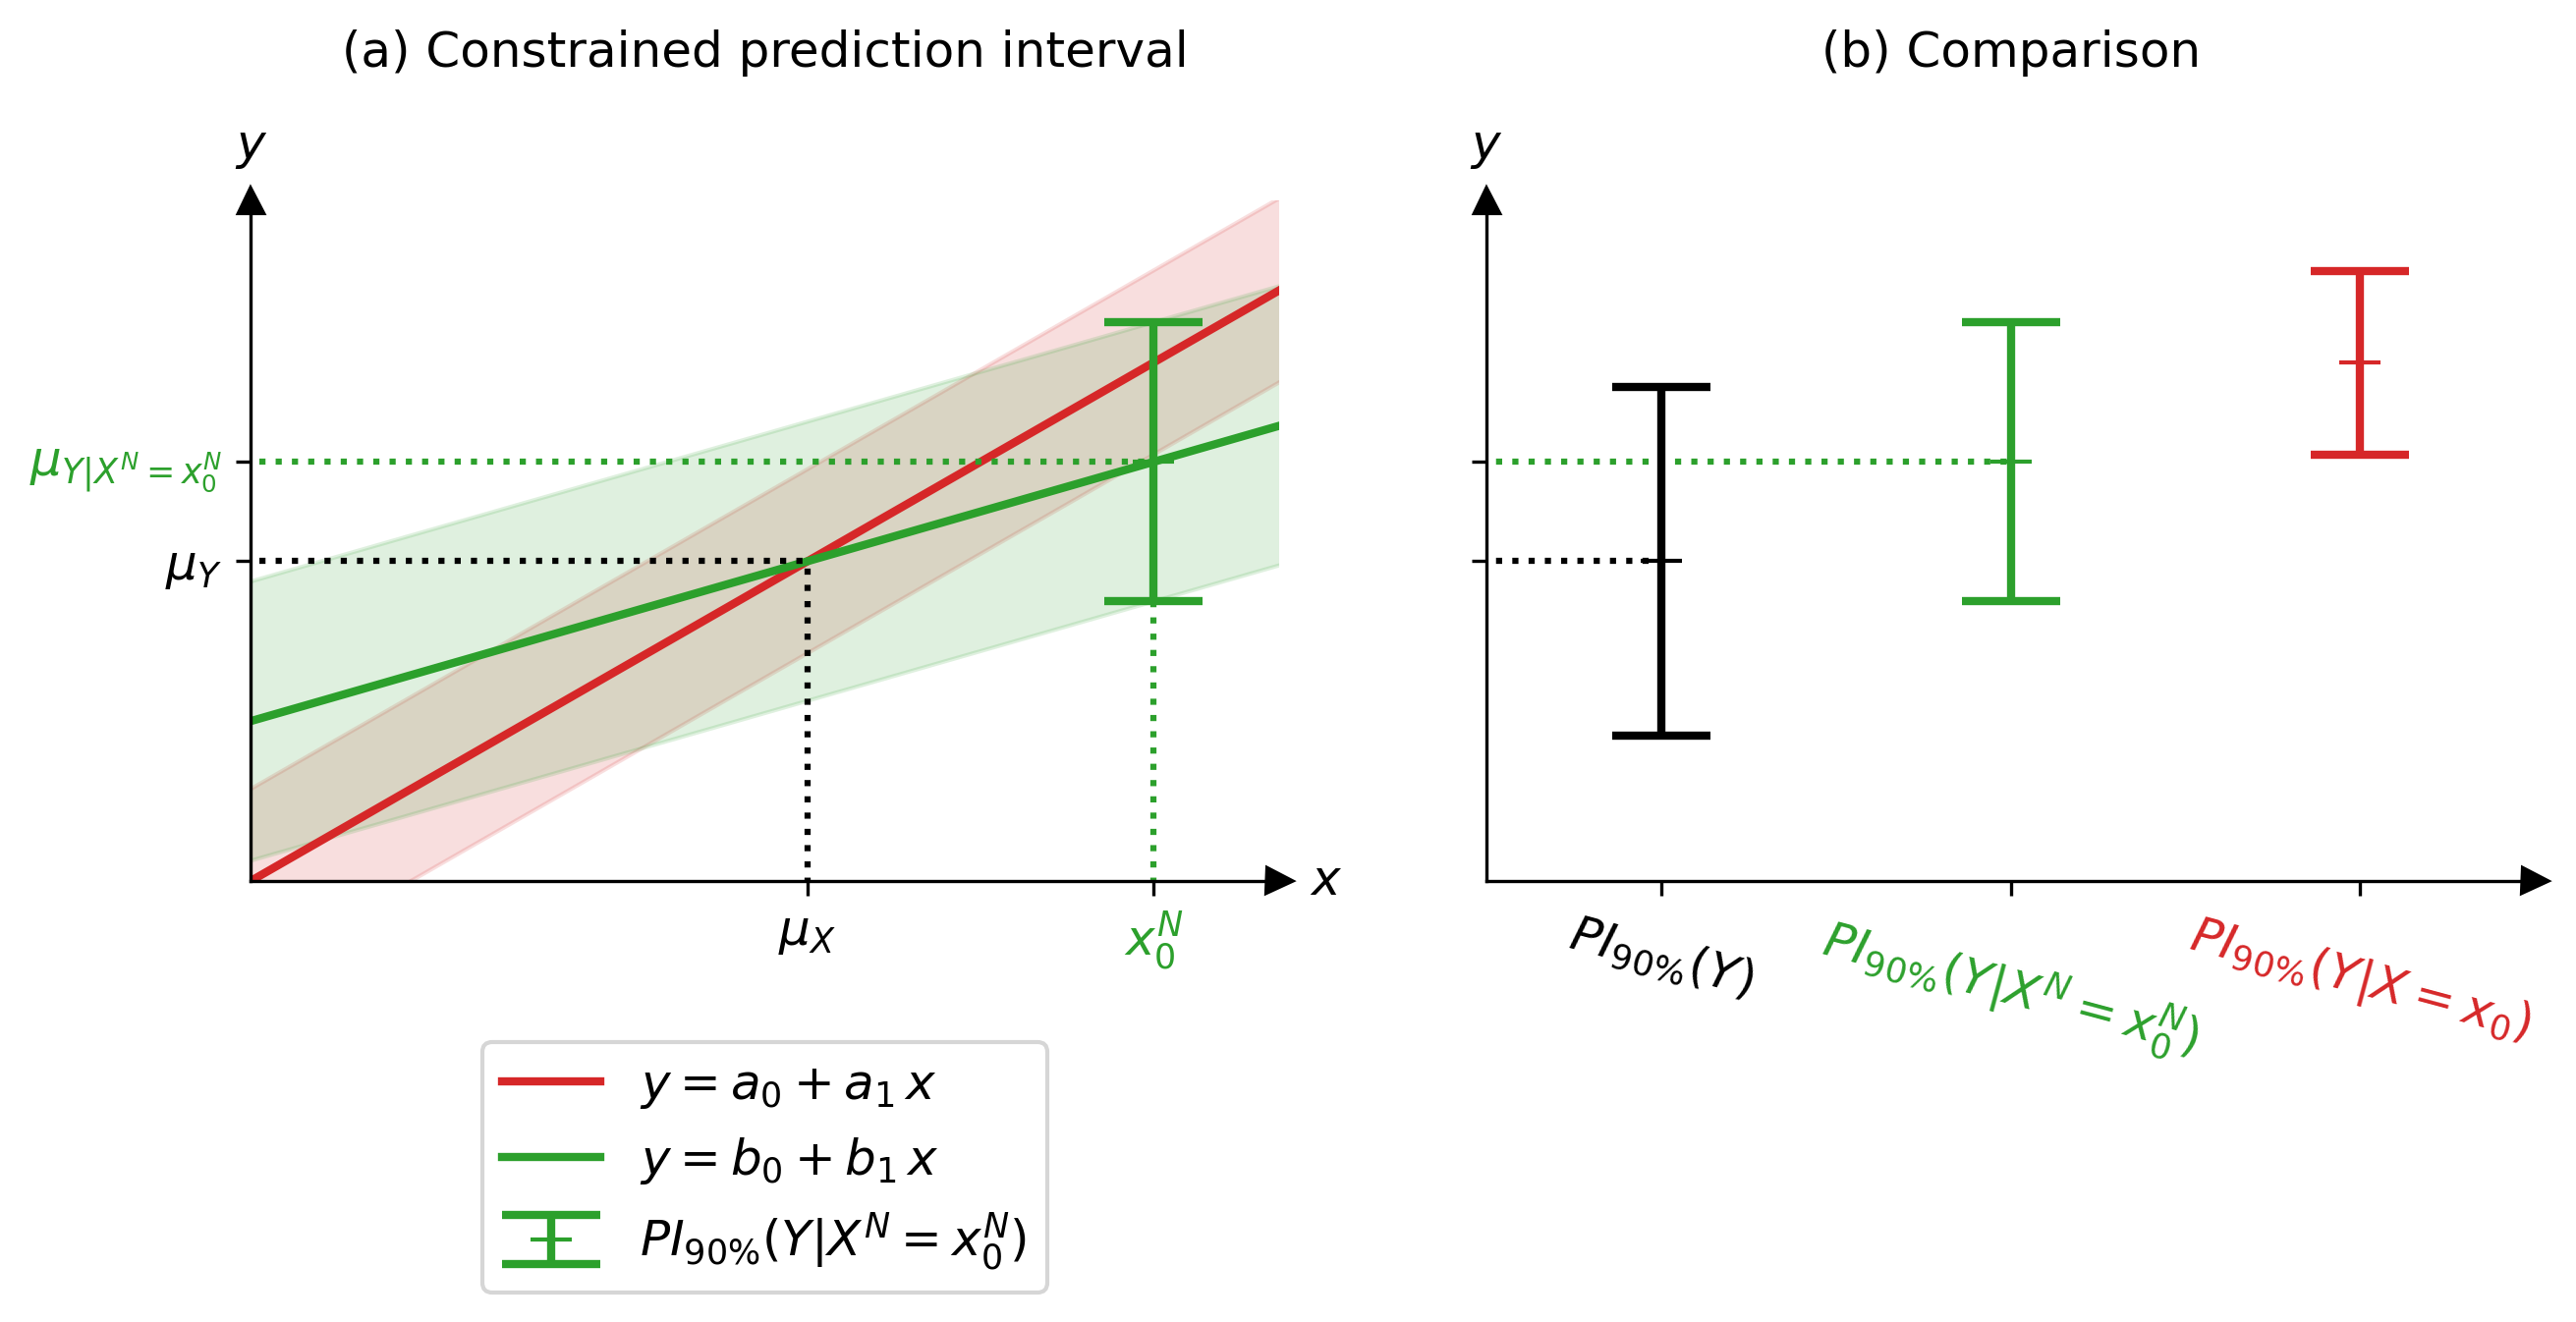

In [17]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

step  = 0.5
alpha = 0.15

Y_simu_ = beta_0+beta_1*X_simu_
ymin,ymax = Y_simu_.min(), Y_simu_.max()#+5
xmin,xmax = X_simu_.min(), X_simu_.max()-1#+2*step

fig, axes = plt.subplots(1,2, figsize=(10,3), sharey=True, width_ratios=(1,1.02), dpi=dpi)#, sharex=True)

label_uncons_theo = r"$PI_{90\%}(Y|X^N=x_0^N)$"# r"$[b_0+b_1\,x_0^N \pm z\, \sigma_{\varepsilon^N}]$"
label_cons_theo   = r"$PI_{90\%}(Y)$" # r"$[\mu_Y \pm z\, \sigma_{Y}]$"

color_cons_noisy = "tab:green"
colors = ["black", color_cons_noiseless, color_cons_noisy]

# Constrained by non-noisy
axes[0].plot(x, beta_0+beta_1*x, color=colors[1], linewidth=lw_low, linestyle='solid', label=r"$y=a_0+a_1\,x$")
axes[0].set_xticks([mu_X_theo, X_obs], labels=[r"$\mu_X$", r"$x_0$"], fontsize=fontsize)
for ticklabel, tickcolor in zip(axes[0].get_xticklabels(), ["black", color_cons_noisy]):
            ticklabel.set_color(tickcolor)
axes[0].fill_between(x, beta_0+beta_1*x-np.abs(np.diff(interval_nonnoisy_theo))/2,
                        beta_0+beta_1*x+np.abs(np.diff(interval_nonnoisy_theo))/2,
                        alpha=alpha, color=colors[1])
#axes[0].plot(x, beta_0+beta_1*x-np.abs(np.diff(interval_nonnoisy_theo))/2, color=colors[1], linewidth=lw_high/2, linestyle='solid')
#axes[0].plot(x, beta_0+beta_1*x+np.abs(np.diff(interval_nonnoisy_theo))/2, color=colors[1], linewidth=lw_high/2, linestyle='solid')



# Constrained by noisy
axes[0].plot(x, beta_0_noisy+beta_1_noisy*x, color=colors[2], linewidth=lw_low, linestyle='solid', label=r"$y=b_0+b_1\,x$")
axes[0].set_xticks([mu_X_theo, X_obs], labels=[r"$\mu_X$", r"$x_0^N$"], fontsize=fontsize)
plot_interval(axes[0], X_obs, interval_noisy_theo, colors[2], lw_low, w_bar=w_bar_true, label=label_uncons_theo)
axes[0].fill_between(x, beta_0_noisy+beta_1_noisy*x-np.abs(np.diff(interval_noisy_theo))/2,
                        beta_0_noisy+beta_1_noisy*x+np.abs(np.diff(interval_noisy_theo))/2,
                        alpha=alpha, color=colors[2])
#axes[0].plot(x, beta_0_noisy+beta_1_noisy*x-np.abs(np.diff(interval_noisy_theo))/2, color=colors[2], linewidth=lw_high/2, linestyle='solid')
#axes[0].plot(x, beta_0_noisy+beta_1_noisy*x+np.abs(np.diff(interval_noisy_theo))/2, color=colors[2], linewidth=lw_high/2, linestyle='solid')
axes[0].set_title("(a) Constrained prediction interval\n\n")
axes[0].legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.2), loc='upper center')


# Pointillés
j = -1
colors = ["black", color_cons_noisy]
for (x_temp,y_temp) in [(mu_X_theo,np.mean(interval_unconstrained_theo)), (X_obs,np.mean(interval_noisy_theo))]:
    axes[0].vlines(x_temp, color=colors[j+1], linestyle="dotted", ymax=y_temp, ymin=-10000)
    axes[0].hlines(y_temp, color=colors[j+1], linestyle="dotted", xmin=-1000, xmax=x_temp)
    axes[1].hlines(y_temp, color=colors[j+1], linestyle="dotted", xmin=-1000, xmax=j)
    j += 1
colors = ["black", color_cons_noiseless, color_cons_noisy]



# Constrained non-noisy VS constrained noisy VS unconstrained
plot_interval(axes[1], -1, interval_unconstrained_theo, colors[0], lw_low, w_bar=w_bar_true, label=label_uncons_theo)
plot_interval(axes[1], 1, interval_nonnoisy_theo, colors[1], lw_low, w_bar=w_bar_true, label=label_cons_theo)
plot_interval(axes[1], 0, interval_noisy_theo, colors[2], lw_low, w_bar=w_bar_true, label=label_cons_theo)
axes[1].set_title("(b) Comparison\n\n", fontsize=fontsize)
axes[1].set_xlim(-1.5,1.5)
axes[1].set_xticks([-1,1,0])
#axes[1].set_xticklabels(["Constrained\n\n"+label_uncons_theo, "Unconstrained\n\n"+label_cons_theo], fontsize=fontsize, rotation=0)
axes[1].set_xticklabels([r"$PI_{90\%}(Y)$",
                         r"$PI_{90\%}(Y|X=x_0)$",
                         r"$PI_{90\%}(Y|X^N=x_0^N)$"], fontsize=fontsize, rotation=-15)
for ticklabel, tickcolor in zip(axes[1].get_xticklabels(), ["black", color_cons_noiseless, color_cons_noisy]):
    ticklabel.set_color(tickcolor)


axes[1].text(-1.5, ymax+0.5, r'$y$', fontsize=fontsize,
               horizontalalignment='center', verticalalignment='center')


for i in range(1):
    axes[i].set_ylim(ymin, ymax)
    axes[i].set_xlim(xmin, xmax)
    axes[i].text(xmin, ymax+0.5, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
    axes[i].text(xmax+0.3, ymin, r'$x$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
for i in range(2):
    axes[i].spines['top'].set_visible(False)
    axes[i].spines['right'].set_visible(False)
    axes[i].set_yticks([np.mean(interval_unconstrained_theo), np.mean(interval_noisy_theo)],
                             labels=[r"$\mu_Y$", r"$\mu_{Y|X^N=x_0^N}$"], fontsize=fontsize)
    for ticklabel, tickcolor in zip(axes[i].get_yticklabels(), ["black", color_cons_noisy]):
        ticklabel.set_color(tickcolor)

    
#--------------- Flèche au bout des axes
for i in range(2):
    xmin,xmax=np.copy(axes[i].get_xlim())
    ymin,ymax=np.copy(axes[i].get_ylim())
    axes[i].plot((xmax), (ymin), ls="", marker=">", ms=6, color="k", #transform=ax.get_yaxis_transform(), 
                clip_on=False)
    axes[i].plot((xmin), (ymax), ls="", marker="^", ms=6, color="k", #transform=ax.get_xaxis_transform(), 
            clip_on=False)
    axes[i].set_xlim(xmin,xmax)
    axes[i].set_ylim(ymin,ymax)


plt.show()

# Figure 8

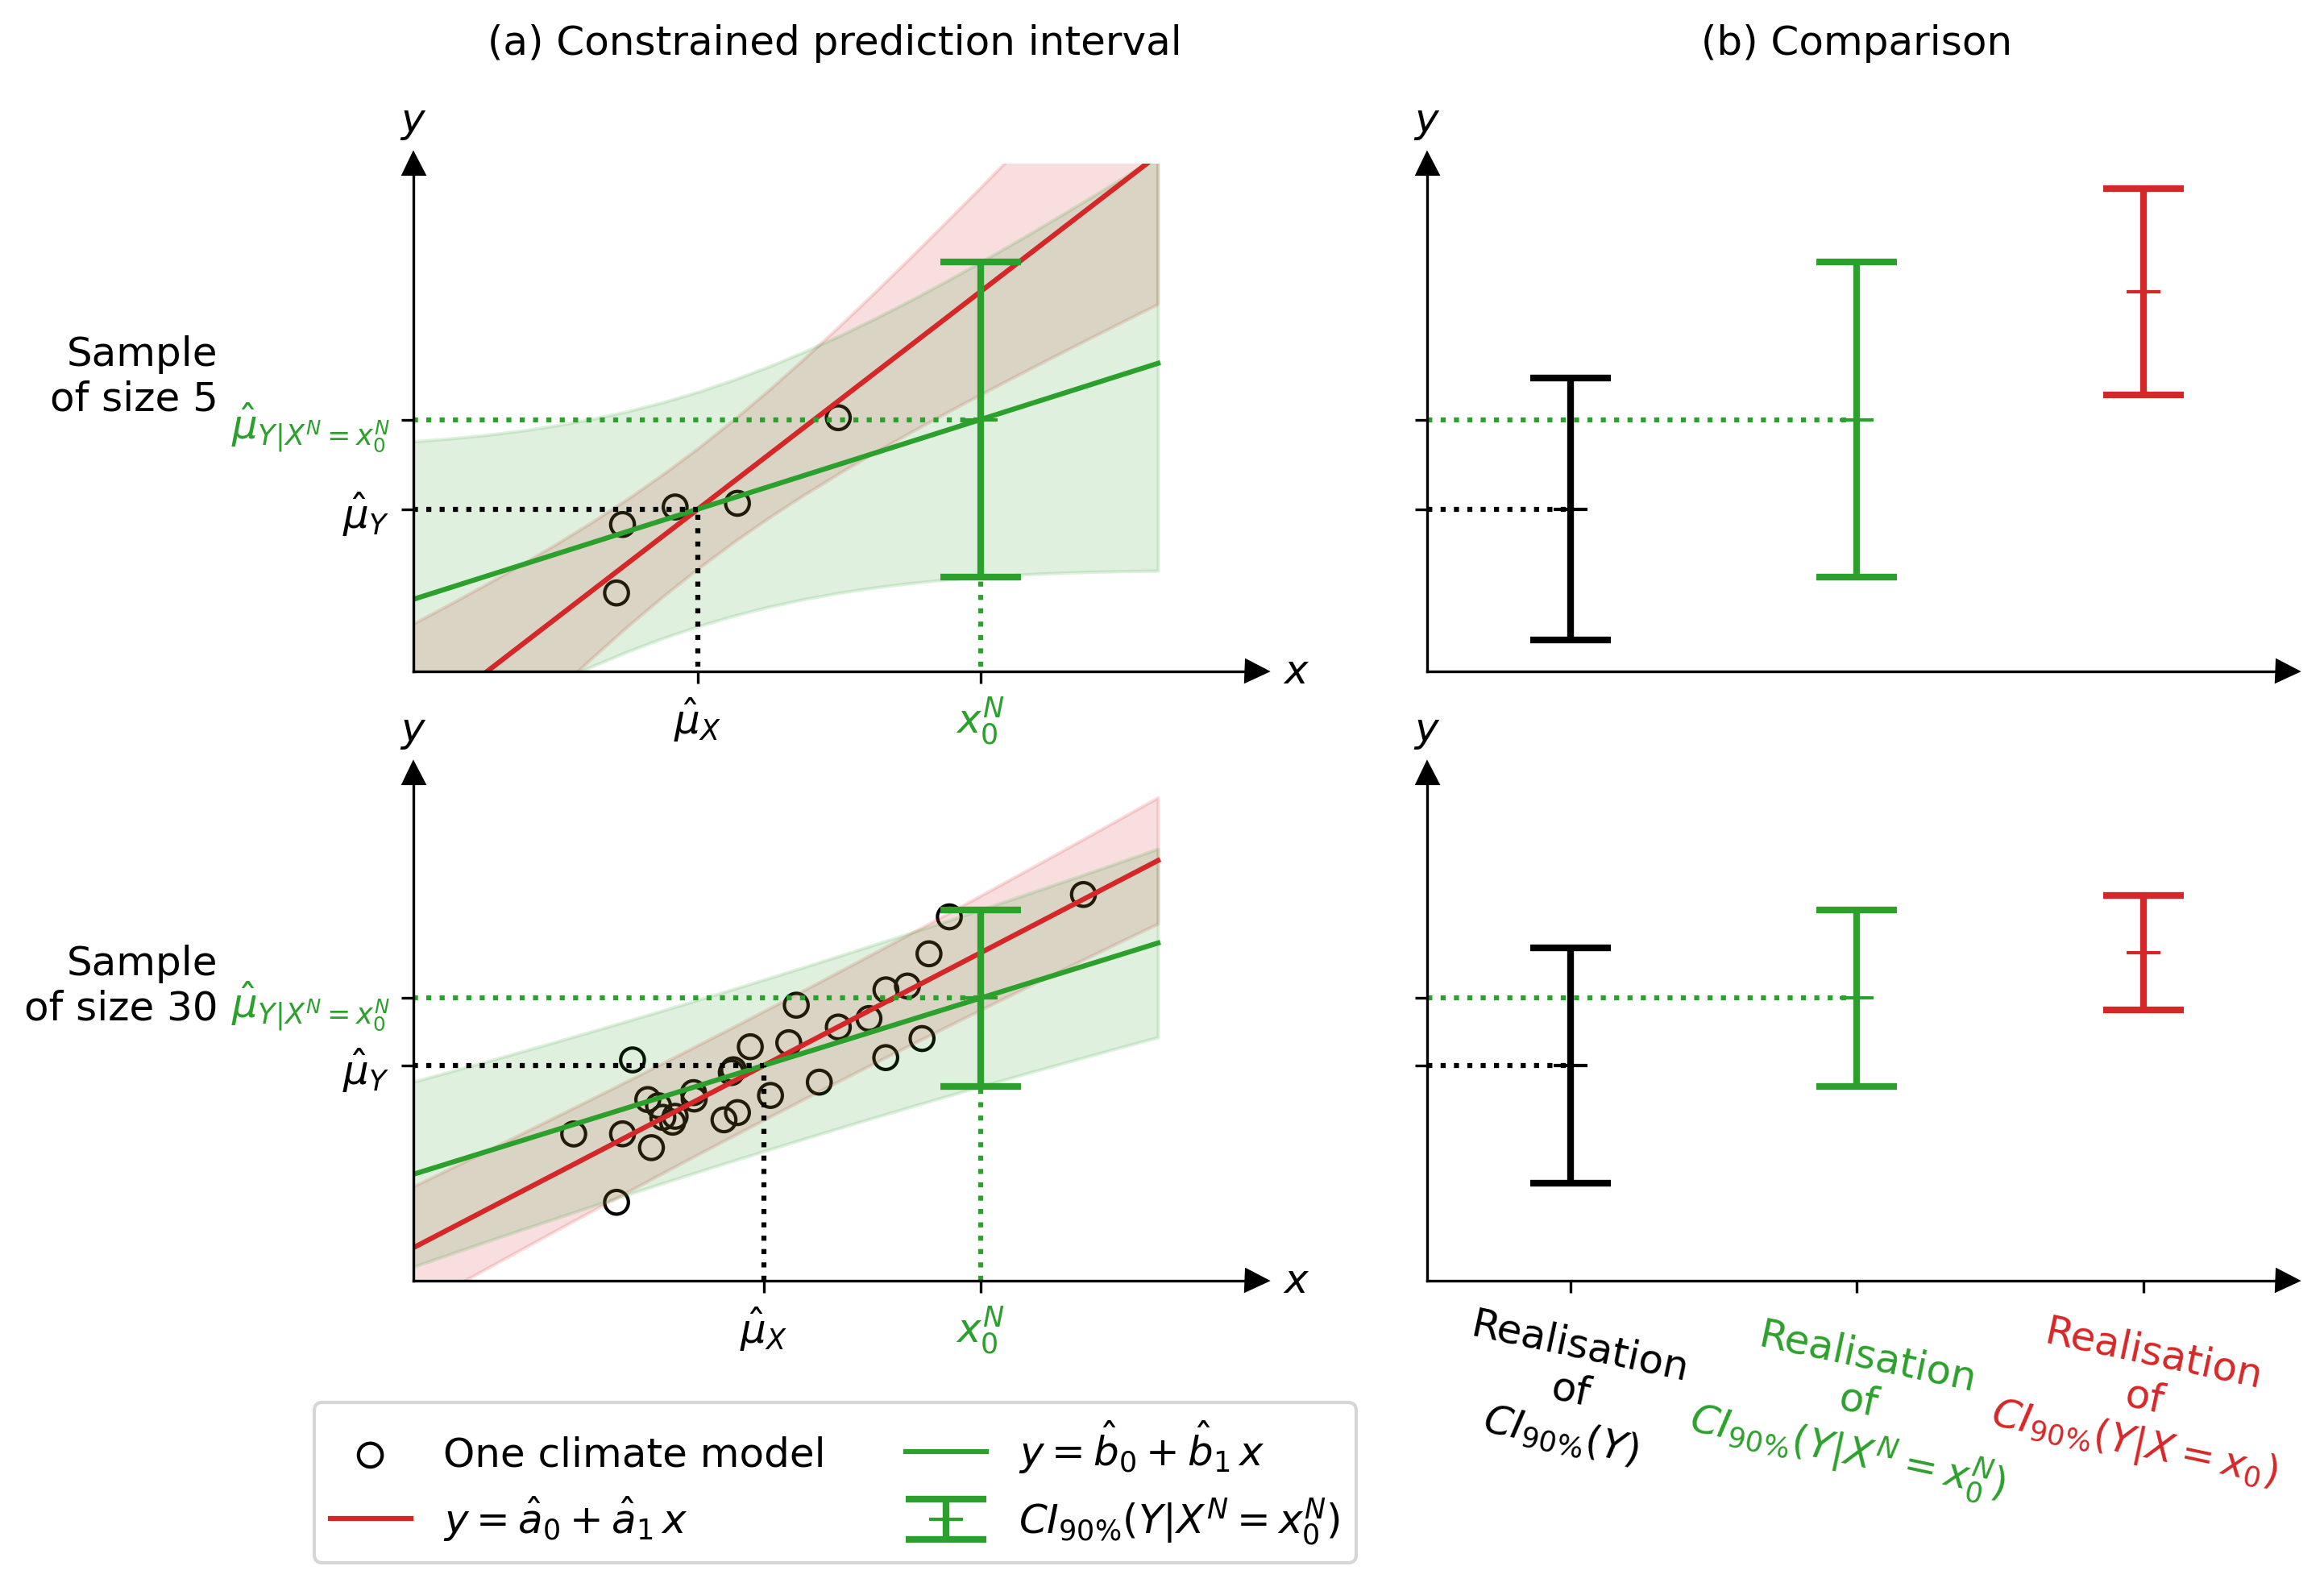

In [18]:
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.5

step  = 0.5
alpha = 0.15

Y_simu_ = beta_0+beta_1*X_simu_
ymin,ymax = Y_simu_.min()-0.5, Y_simu_.max()+1.5#+5
xmin,xmax = X_simu_.min(), X_simu_.max()+1#+2*step

fig, axes = plt.subplots(2,2, figsize=(10,6), sharey='row', width_ratios=(1,1.02), dpi=dpi)#, sharex=True)


colors = ["black", color_cons_noiseless, color_cons_noisy]
list_letters = ["a", "b", "c", "d"]
# Estimated
for i in range(nb_plots):
    X_simu = list_X_simu[i]
    Y_simu = list_Y_simu[i]
    interval_nonnoisy_est       = list_interval_nonnoisy[i]
    intervals_nonnoisy_est      = list_intervals_nonnoisy[i]
    interval_noisy_est          = list_interval_noisy[i]
    intervals_noisy_est         = list_intervals_noisy[i]
    interval_unconstrained_est  = list_interval_unconstrained[i]

    label1 = r"$[a_0+a_1\,x_0 \pm z\, \sigma_{\varepsilon}]$"
    label2 = r"$[\hat{a}_0+\hat{a}_1\,x_0 \pm z \, \hat{\sigma}_{\varepsilon}]$"
    label3 = r"$CI_{90\%}(Y|X^N=x_0^N)$" # r"$[\hat{b}_0+\hat{b}_1\,x_0 \pm t^{M-2} \, \hat{\sigma}_{\varepsilon^N} \, \sqrt{1+\frac{1}{M}+\frac{(x_0^N-\hat{\mu}_X)^2}{M\,(\hat{\sigma}_X^2+\sigma_N^2)}}]$"
    
    #axes[i+1].set_xticks([np.mean(X_simu), X_obs], labels=[r"$\hat{\mu}_X$", r"$x_0$"], fontsize=fontsize)    
    #axes[i+1].set_title("{}. Estimated on a sample\nof size {}".format(list_letters[i+1], len(X_simu)), color=colors[i])
        
    label  = "One climate model"
        
    # Constrained
    axes[i,0].scatter(X_simu, Y_simu, s=50, marker="o", facecolor='none', edgecolors=colors[0], label=label)
    axes[i,0].set_xticks([np.mean(X_simu), X_obs], labels=[r"$\hat{\mu}_X$", r"$x_0^N$"], fontsize=fontsize)
    for ticklabel, tickcolor in zip(axes[i,0].get_xticklabels(), ["black", color_cons_noisy]):
            ticklabel.set_color(tickcolor)
    plot_interval(axes[i,0], X_obs, interval_noisy_est, colors[2], lw_low, w_bar=w_bar_right, label=label3)
    #for k in range(2): axes[i,0].plot(x, intervals_nonnoisy_est[:, k], color=colors[1], linewidth=lw_low/2, linestyle='solid')
    #for k in range(2): axes[i,0].plot(x, intervals_noisy_est[:, k], color=colors[2], linewidth=lw_high/2, linestyle='solid')
    axes[i,0].fill_between(x, intervals_nonnoisy_est[:,0], intervals_nonnoisy_est[:,1],
                         alpha=alpha, color=colors[1])
    axes[i,0].fill_between(x, intervals_noisy_est[:,0], intervals_noisy_est[:,1],
                         alpha=alpha, color=colors[2])
    if i==0: axes[i,0].set_title("(a) Constrained prediction interval\n\n")
    axes[i,0].plot(x, np.mean(intervals_nonnoisy_est, axis=1), color=colors[1],
             linewidth=lw_high/2, linestyle='solid', label=r"$y=\hat{a}_0+\hat{a}_1\,x$")
    axes[i,0].plot(x, np.mean(intervals_noisy_est, axis=1), color=colors[2],
             linewidth=lw_high/2, linestyle='solid', label=r"$y=\hat{b}_0+\hat{b}_1\,x$")
    if i==1: axes[i,0].legend(fontsize=fontsize, bbox_to_anchor=(0.5, -0.2), loc='upper center', ncols=2)
    
    # Pointillés
    j = -1
    colors = ["black", color_cons_noisy]
    for (x_temp,y_temp) in [(np.mean(X_simu),np.mean(interval_unconstrained_est)), (X_obs,np.mean(interval_noisy_est))]:
        axes[i,0].vlines(x_temp, color=colors[j+1], linestyle="dotted", ymax=y_temp, ymin=-10000)
        axes[i,0].hlines(y_temp, color=colors[j+1], linestyle="dotted", xmin=-1000, xmax=x_temp)
        axes[i,1].hlines(y_temp, color=colors[j+1], linestyle="dotted", xmin=-1000, xmax=j)
        j += 1
    colors = ["black", color_cons_noiseless, color_cons_noisy]

    
    # Constrained VS unconstrained
    plot_interval(axes[i,1], -1, interval_unconstrained_est, colors[0], lw_low, w_bar=w_bar_right, label=label3)
    plot_interval(axes[i,1], 1, interval_nonnoisy_est, colors[1], lw_low, w_bar=w_bar_right, label=label3)
    plot_interval(axes[i,1], 0, interval_noisy_est, colors[2], lw_low, w_bar=w_bar_right, label=label3)
    if i==0: axes[i,1].set_title("(b) Comparison\n\n", fontsize=fontsize)
    axes[i,1].set_xlim(-1.5,1.5)
    if i==1:
        axes[i,1].set_xticks([-1,1,0])
        axes[i,1].set_xticklabels(["Realisation\nof\n"+r"$CI_{90\%}(Y)$",
                                 "Realisation\nof\n"+r"$CI_{90\%}(Y|X=x_0)$",
                                 "Realisation\nof\n"+r"$CI_{90\%}(Y|X^N=x_0^N)$"], fontsize=fontsize, rotation=-12)
        for ticklabel, tickcolor in zip(axes[i,1].get_xticklabels(), ["black", color_cons_noiseless, color_cons_noisy]):
            ticklabel.set_color(tickcolor)
        ticks = axes[i,1].get_xticklabels()
        #ticks[-1].set_rotation(10)
    else: axes[i,1].set_xticks([])
    axes[i,1].text(-1.5, ymax+0.7, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')


    axes[i,0].set_ylim(ymin, ymax)
    axes[i,0].set_xlim(xmin, xmax)
    axes[i,0].text(xmin, ymax+0.7, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
    axes[i,0].text(xmax+0.4, ymin, r'$x$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')
    
    for j in range(2):
        axes[i,j].spines['top'].set_visible(False)
        axes[i,j].spines['right'].set_visible(False)
        axes[i,j].set_yticks([np.mean(interval_unconstrained_est), np.mean(interval_noisy_est)],
                             labels=[r"$\hat{\mu}_Y$", r"$\hat{\mu}_{Y|X^N=x_0^N}$"], fontsize=fontsize)
        for ticklabel, tickcolor in zip(axes[i,j].get_yticklabels(), ["black", color_cons_noisy]):
            ticklabel.set_color(tickcolor)
    
    axes[i,0].set_ylabel("Sample\nof size {}".format(len(X_simu)), color="black",
                         rotation=0, horizontalalignment='right', fontsize=fontsize)




if False:
    for xtick, color in zip(ax.get_xticklabels(), colors[:3]):
        xtick.set_color(color)
    
    ymin,ymax=ax.get_ylim()
    xmin,xmax=ax.get_xlim()
    ax.text(xmin, ymax+0.1, r'$y$', fontsize=fontsize,
                   horizontalalignment='center', verticalalignment='center')

#--------------- Flèche au bout des axes
for i in range(nb_plots):
    for j in range(2):
        xmin,xmax=np.copy(axes[i,j].get_xlim())
        ymin,ymax=np.copy(axes[i,j].get_ylim())
        axes[i,j].plot((xmax), (ymin), ls="", marker=">", ms=6, color="k", #transform=ax.get_yaxis_transform(), 
                    clip_on=False)
        axes[i,j].plot((xmin), (ymax), ls="", marker="^", ms=6, color="k", #transform=ax.get_xaxis_transform(), 
                clip_on=False)
        axes[i,j].set_xlim(xmin,xmax)
        axes[i,j].set_ylim(ymin,ymax)
    

plt.show()

# Figure 9

## New parameters

In [19]:
# DISPLAY PARAMETERS
# Confidence of the confidence interval
conf1 = 0.90 # 90 % confidence
lw = 2
dpi = 300
fontsize = 12
lw_low  = 2
lw_high = 3
w_bar_wrong = 0.4
w_bar_right = 0.6
w_bar_true  = 0.6


# Parameters for the creation of random datasets
mu_X_theo    = 0
sigma_X_theo = 1
sigma_N      = 1*sigma_X_theo 
var_N        = np.square(sigma_N)
mu_Y_theo    = 0
sigma_Y_theo = 1
corr_theo    = 0.9
cov_XY_theo  = corr_theo*sigma_X_theo*sigma_Y_theo
sigma_eps_theo = np.sqrt(sigma_Y_theo**2 - cov_XY_theo**2 / sigma_X_theo**2)
SNR_theo       = sigma_X_theo/sigma_N

X_obs = np.array(3)

np.random.seed(300)

## New data

In [20]:
# Linear relation Y = beta_0 + beta_1 * X
beta_1   = cov_XY_theo/sigma_X_theo**2
beta_0   = mu_Y_theo - beta_1*mu_X_theo

# Linear relation Y = beta_0_noisy + beta_1_noisy * X^N
beta_1_noisy = cov_XY_theo/(sigma_X_theo**2+var_N)
beta_0_noisy = mu_Y_theo - beta_1_noisy*mu_X_theo

# Sizes of the datasets
list_M        = [5, 30]
nb_plots      = len(list_M)

# Storage of the simulated data and resulting confidence intervals
list_X_simu   = []
list_Y_simu   = []
list_epsilon  = []
list_interval_unconstrained = [] # Confidence intervals of Y unconstrained  
list_interval_nonnoisy      = [] # Confidence intervals of Y constrained by one noiseless observation
list_interval_noisy         = [] # Confidence intervals of Y constrained by one noisy observation
list_intervals_nonnoisy     = [] # Confidence intervals of Y constrained by one noiseless observation at different positions (to obtain the tube in the figure)
list_intervals_noisy        = [] # Confidence intervals of Y constrained by one noisy observation at different positions 


X_simu_  = np.random.normal(mu_X_theo, sigma_X_theo, 1000)
epsilon_ = np.random.normal(0, sigma_eps_theo, 1000)
for i in range(nb_plots):
    M       = list_M[i]
    X_simu  = X_simu_[:M]
    epsilon = epsilon_[:M]
    Y_simu  = beta_0 + beta_1*X_simu + epsilon
    x       = np.linspace(X_simu_.min()-10, X_simu_.max())

    mu_Y_est         = np.mean(Y_simu)
    mu_X_est         = np.mean(X_simu)
    sigma_Y_est      = np.std(Y_simu)
    sigma_X_est      = np.std(X_simu)
    beta_1_est       = np.cov(X_simu,Y_simu)[0,1]/sigma_X_est**2
    beta_0_est       = mu_Y_est - beta_1_est*mu_X_est
    corr_est         = np.corrcoef(X_simu,Y_simu)[0,1]
    SNR_est          = np.std(X_simu)/sigma_N
    beta_1_noisy_est = np.cov(X_simu,Y_simu)[0,1]/(sigma_X_est**2+var_N)
    beta_0_noisy_est = mu_Y_est - beta_1_noisy_est*mu_X_est
    
    term1   = np.sqrt(1+1/M)
    term2   = np.sqrt(1+1/M+(X_obs-mu_X_est)**2/(M*sigma_X_est**2))
    term2_x = np.sqrt(1+1/M+(x.reshape(-1,1)-mu_X_est)**2/(M*sigma_X_est**2))
    term3   = np.sqrt(1+1/M+(X_obs-mu_X_est)**2/(M*(sigma_X_est**2+var_N)))
    term3_x = np.sqrt(1+1/M+(x.reshape(-1,1)-mu_X_est)**2/(M*(sigma_X_est**2+var_N)))
    

    interval_unconstrained_est = mu_Y_est + np.array(t.interval(conf1, M-1, loc=0, scale=1))*sigma_Y_est*term1
    interval_nonnoisy_est      = beta_0_est+beta_1_est*X_obs + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-corr_est**2)*term2
    interval_noisy_est         = beta_0_noisy_est+beta_1_noisy_est*X_obs + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-(corr_est**2/(1+1/SNR_est**2)))*term3
    intervals_nonnoisy_est     = beta_0_est+beta_1_est*x.reshape(-1,1) + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-corr_est**2)*term2_x
    intervals_noisy_est        = beta_0_noisy_est+beta_1_noisy_est*x.reshape(-1,1) + np.array(t.interval(conf1, M-2, loc=0, scale=1))*sigma_Y_est*np.sqrt(1-(corr_est**2/(1+1/SNR_est**2)))*term3_x

    list_X_simu.append(X_simu)
    list_Y_simu.append(Y_simu)
    list_epsilon.append(epsilon)
    list_interval_unconstrained.append(interval_unconstrained_est)
    list_interval_nonnoisy.append(interval_nonnoisy_est)
    list_intervals_nonnoisy.append(intervals_nonnoisy_est)
    list_interval_noisy.append(interval_noisy_est)
    list_intervals_noisy.append(intervals_noisy_est)


interval_unconstrained_theo = mu_Y_theo + np.array(t.interval(conf1, np.inf, loc=0, scale=1))*sigma_Y_theo
interval_nonnoisy_theo      = beta_0+beta_1*X_obs + np.array(t.interval(conf1, np.inf, loc=0, scale=1))*sigma_Y_theo*np.sqrt(1-corr_theo**2)
interval_noisy_theo         = beta_0_noisy+beta_1_noisy*X_obs + np.array(t.interval(conf1, np.inf, loc=0, scale=1)
                                                            )*sigma_Y_theo*np.sqrt(1-(corr_theo**2/(1+1/SNR_theo**2)))
                               
                               

In [21]:
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by multiplying (1-luminosity) by the given amount.
    Input can be matplotlib color string, hex string, or RGB tuple.

    Examples:
    >> lighten_color('g', 0.3)
    >> lighten_color('#F034A3', 0.6)
    >> lighten_color((.3,.55,.1), 0.5)
    """
    import matplotlib.colors as mc
    import colorsys
    try:
        c = mc.cnames[color]
    except:
        c = color
    c = colorsys.rgb_to_hls(*mc.to_rgb(c))
    return colorsys.hls_to_rgb(c[0], 1 - amount * (1 - c[1]), c[2])

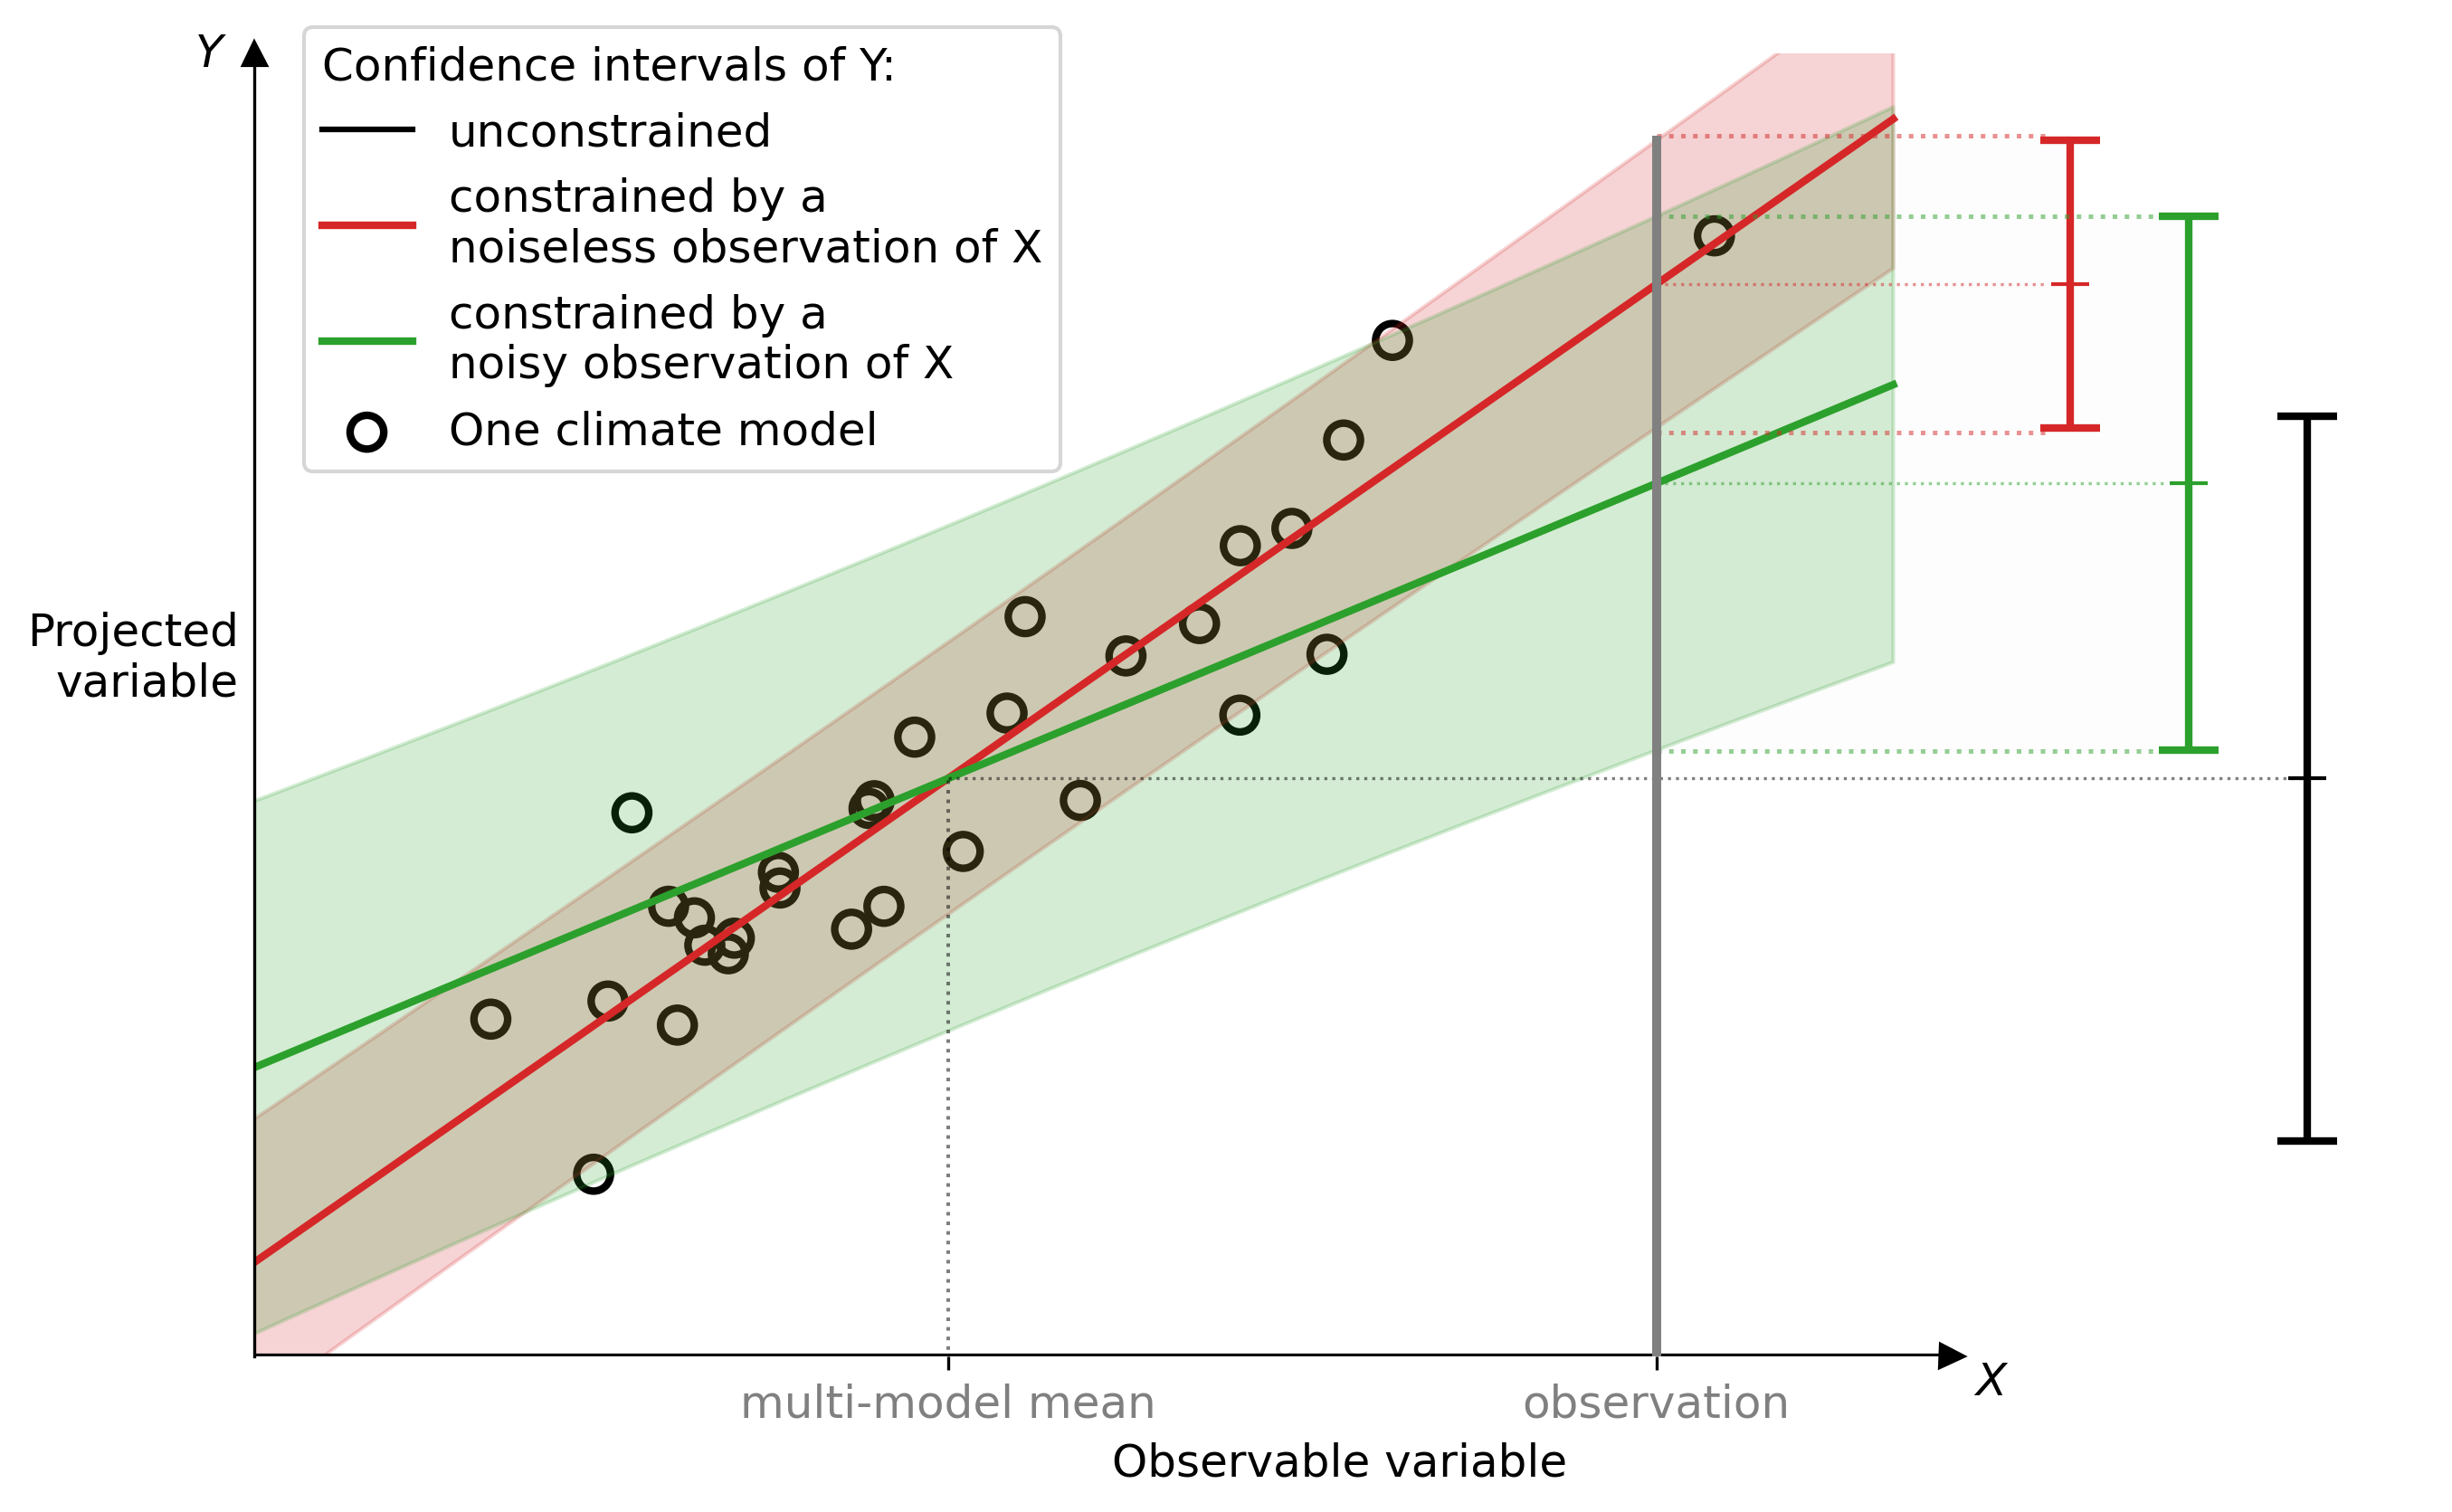

In [22]:
if True:
    linestyle3_ = 'solid'
else:
    linestyle3_ = linestyle3
    
linewidth = 2
    
i = 1
X_simu, Y_simu = list_X_simu[i], list_Y_simu[i]
M = 30
X_simu, Y_simu = X_simu[:M], Y_simu[:M]
s = 20

x_space = 0.5
before_interv = 0.1 #0.18

xmargin = 1
ymargin = 1
xmin, xmax = X_simu.min()-xmargin, X_simu.max()+xmargin
ymin, ymax = Y_simu.min()-ymargin, Y_simu.max()+ymargin
#x = np.linspace(xmin-10, xmax+10)
M = len(X_simu)

color1='black'
color2='tab:red'
color3='tab:green'
marker = 'o'
facecolor = 'none'
linestyle2 = 'solid'

fig, ax1 = plt.subplots(1,1, figsize=(10,6), dpi=dpi)

#--------- Unconstrained
interval_obs0 = np.mean(Y_simu) + np.array(t.interval(conf1, M)) * np.std(Y_simu)*np.sqrt(1+1/M)
plot_interval(ax1, xmax+3*x_space, interval_obs0, color1, lw, w_bar=0.4)

#--------- Constrained (non-noisy) intervals
beta_1_est = np.cov(X_simu, Y_simu)[0,1]/(np.var(X_simu))
beta_0_est = np.mean(Y_simu) - beta_1_est*np.mean(X_simu)
epsilon   = Y_simu - beta_0_est - beta_1_est*X_simu
var_eps_N = np.var(epsilon)
Y_est     = beta_0_est + beta_1_est*X_obs
y         = beta_0_est + beta_1_est*x
interval  = beta_0_est + beta_1_est*x + np.array(t.interval(conf1, M)).reshape(-1,1) * np.sqrt(var_eps_N)*np.sqrt(
                                            1+1/M+(x-np.mean(X_simu))**2/(M*np.var(X_simu)+M*var_N))
interval_obs1 = beta_0_est + beta_1_est*X_obs + np.array(t.interval(conf1, M)).reshape(-1,1) * np.sqrt(var_eps_N)*np.sqrt(
                                            1+1/M+(X_obs-np.mean(X_simu))**2/(M*np.var(X_simu)+M*var_N))



line4 = ax1.scatter(X_simu, Y_simu, s=4*s, marker=marker, color=color1, facecolor=facecolor,
            edgecolors=color1, linewidths=2, label="One climate model")
#ax1.legend(fontsize=fontsize)

    
line2, = ax1.plot(x,y, color=color2, linestyle=linestyle2, linewidth=linewidth)
#ax1.plot(x, interval[0], linestyle=linestyle2, color=color2)
#ax1.plot(x, interval[1], linestyle=linestyle2, color=color2)
#ax1.fill_between(x, interval[0], interval[1], color="none", edgecolor=color, alpha=0.2, hatch="X")
ax1.fill_between(x, interval[0], interval[1], color=color2, alpha=0.2)
plot_interval(ax1, xmax+1*x_space, interval_obs1, color2, lw, w_bar=0.4)
ax1.set_xlim(xmin, xmax)
ax1.set_ylim(ymin, ymax)





#--------- Constrained (noisy) intervals
beta_1_est = np.cov(X_simu, Y_simu)[0,1]/(np.var(X_simu)+var_N)
beta_0_est = np.mean(Y_simu) - beta_1_est*np.mean(X_simu)
epsilon   = Y_simu - beta_0_est - beta_1_est*X_simu
var_eps_N = np.var(epsilon) + beta_1_est**2 * var_N
Y_est     = beta_0_est + beta_1_est*X_obs
y         = beta_0_est + beta_1_est*x
interval  = beta_0_est + beta_1_est*x + np.array(t.interval(conf1, M)).reshape(-1,1) * np.sqrt(var_eps_N)*np.sqrt(
                                            1+1/M+(x-np.mean(X_simu))**2/(M*np.var(X_simu)+M*var_N))
interval_obs2 = beta_0_est + beta_1_est*X_obs + np.array(t.interval(conf1, M)).reshape(-1,1) * np.sqrt(var_eps_N)*np.sqrt(
                                            1+1/M+(X_obs-np.mean(X_simu))**2/(M*np.var(X_simu)+M*var_N))


line3, = ax1.plot(x,y, color=color3, linestyle=linestyle3_, linewidth=linewidth)
#ax1.plot(x, interval[0], linestyle=linestyle3_, color=color3)
#ax1.plot(x, interval[1], linestyle=linestyle3_, color=color3)
#ax1.fill_between(x, interval[0], interval[1], color="none", edgecolor=color, alpha=0.4, hatch="\\")
ax1.fill_between(x, interval[0], interval[1], color=color3, alpha=0.2)

plot_interval(ax1, xmax+2*x_space, interval_obs2, color3, lw, w_bar=0.4)
#ax2.set_xlim(-0.5, 2.5)
#axes.set_ylim(ymin, ymax)

j = 0
list_colors = [color3, color2] # color1
list_colors_bis = ["gray", "gray", "gray"]
#     (np.mean(X_simu),np.mean(interval_unconstrained_est),np.min(interval_unconstrained_est),np.max(interval_unconstrained_est)),
mmax_ = -1000
mmin_ = 1000



alpha_behind = 0.35
linestyle_main = 'dotted' #(0,(5,10))
linestyle_second = 'dotted' #(0,(5,10)) # (0,(10,10)), (0,(5,5))
linewidth_main = 0.8 #0.8
linewidth_second = 1.2 #1.6
alpha_lines     = 0.5




ax1.hlines(np.mean(Y_simu), linestyle=linestyle_main, xmin=np.mean(X_simu), xmax=xmax+3*x_space, colors="black", linewidth=linewidth_main, alpha=alpha_lines)
#ax1.hlines(np.mean(Y_simu), linestyle=linestyle_main, xmin=np.mean(X_simu), xmax=X_obs, colors="black", linewidth=linewidth_main)
#ax1.hlines(np.mean(Y_simu), linestyle=linestyle_main, xmin=X_obs, xmax=xmax+2*x_space, colors="black", linewidth=linewidth_main, alpha=alpha_behind)
#ax1.hlines(np.mean(Y_simu), linestyle=linestyle_main, xmin=xmax+2*x_space, xmax=xmax+3*x_space, colors="black", linewidth=linewidth_main)
ax1.vlines(np.mean(X_simu), linestyle=linestyle_main, ymin=-1000, ymax=np.mean(Y_simu), colors="black", linewidth=1.2*linewidth_main, alpha=alpha_lines)

for (x_temp,y_temp, min_, max_, xmax_) in [
    (X_obs,np.mean(interval_noisy_est),np.min(interval_noisy_est),np.max(interval_noisy_est), xmax+2*x_space),
    (X_obs,np.mean(interval_nonnoisy_est),np.min(interval_nonnoisy_est),np.max(interval_nonnoisy_est), xmax+1*x_space)]:
    
    if j==0:
        ax1.hlines(min_, linestyle=linestyle_second, xmin=x_temp, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_second, alpha=alpha_lines, zorder=1000) # (0,(1,5))
        if False:
            ax1.hlines(y_temp, linestyle=linestyle_main, xmin=x_temp, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_main, zorder=1000, alpha=alpha_lines)
            ax1.hlines(max_, linestyle=linestyle_second, xmin=xmax+1*x_space+0.1, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_second, alpha=alpha_lines, zorder=1000)
        else:
            ax1.hlines(y_temp, linestyle=linestyle_main, xmin=x_temp, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_main, zorder=1000, alpha=alpha_lines)
            ax1.hlines(max_, linestyle=linestyle_second, xmin=x_temp, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_second, alpha=alpha_lines, zorder=1000)
    else:
        ax1.hlines(y_temp, linestyle=linestyle_main, xmin=x_temp, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_main, alpha=alpha_lines, zorder=1000)
        ax1.hlines(min_, linestyle=linestyle_second, xmin=x_temp, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_second, alpha=alpha_lines, zorder=1000) # (0,(1,5))
        ax1.hlines(max_, linestyle=linestyle_second, xmin=x_temp, xmax=xmax_-before_interv, colors=list_colors[j], linewidth=linewidth_second, alpha=alpha_lines, zorder=1000)

    array_x_temp = np.linspace(x_temp, xmax_)
    if j==0:
        ax1.fill_between(array_x_temp, min_, max_, color="gray", alpha=0.01)
        #ax1.fill_between(array_x_temp, min_, max_, color=lighten_color("black", amount=0.3), zorder=100, alpha=0.2)
        j = j
    elif j==1:
        ax1.fill_between(array_x_temp, np.max(interval_noisy_est)+0.02, max_, color="gray", alpha=0.01)
        #ax1.fill_between(array_x_temp, min_, max_, color=lighten_color("black", amount=0.3), zorder=100, alpha=0.2)
        j=j
    j += 1
    
    if min_<mmin_: mmin_=np.copy(min_)
    if max_>mmax_: mmax_=np.copy(max_)
        
#ax1.fill_between(np.linspace(X_obs, xmax+2*x_space), mmin_, mmax_+100, color=lighten_color("black", amount=0.0), zorder=99, alpha=0.7)

ax1.vlines(X_obs, color="gray", linestyle="solid", ymax=mmax_, ymin=-1000, linewidth=3*linewidth_main, zorder=1000) #linestyle_main


#--------------- Axes et titres
ax1.set_xticks([X_obs, np.mean(X_simu)])
ax1.set_yticks([])
ax1.set_xticklabels(["observation", "multi-model mean"], fontsize=fontsize, color="gray")
ax1.set_ylabel("Projected\nvariable", fontsize=fontsize, rotation=0, ha="right")
ax1.set_xlabel("Observable variable", fontsize=fontsize, rotation=0)
ax1.text(-0.02,1.0, r"$Y$",
     ha='center', va='center',
     transform = ax1.transAxes, fontsize=fontsize)
ax1.text(0.8,-0.02, r"$X$",
     ha='center', va='center',
     transform = ax1.transAxes, fontsize=fontsize)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
#ax1.hlines(y=ymin, xmin=0, xmax=1, clip_on=True)

    
line1, = plt.plot(x+1000, y, color=color1)
fig.legend([line1, line2, line3, line4],
           ["unconstrained",
            "constrained by a\nnoiseless observation of X",
            "constrained by a\nnoisy observation of X", "One climate model"
            ],
            loc='center left', fontsize=fontsize,
           title="Confidence intervals of Y:", title_fontsize=fontsize,
           alignment='left', bbox_to_anchor=(0.11, 0.78))



#--------------- Flèche au bout des axes
xmin,xmax=np.copy(ax1.get_xlim())
ymin,ymax=np.copy(ax1.get_ylim())
ax1.axhline(ymin, xmax=0.78, clip_on=True, color="black") # !!!!!!
ax1.plot((xmax), (ymin), ls="", marker=">", ms=6, color="k", #transform=ax.get_yaxis_transform(), 
            clip_on=False)
ax1.plot((xmin), (ymax), ls="", marker="^", ms=6, color="k", #transform=ax.get_xaxis_transform(), 
        clip_on=False)
ax1.set_xlim(xmin,xmax)

ax1.set_xlim(xmin,xmax+4*x_space)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.02, 
                    hspace=0)
plt.show()


